# Creación del dataset dsualmh

Antes de nada necesitamos cargar las librerías pandas, matplotlib,networkx y el paquete nilmtk.

Asimismo realizaremos algunos otros ajustes.

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib import rcParams
from nilmtk.utils import print_dict
from nilmtk import DataSet
import warnings
warnings. filterwarnings("ignore")
plt.style.use('bmh')

## Creación del fichero en formato  HDFS5 a partir de las medidas y los metadatos 

La primera tarea es la conversion de los diferentes ficheros de medidas en formato csv al formato HDFS5  (o simplificando H5), que almacenaramos en la carpeta `./data`. Además en el archivo h5, que va contener los datos recopilados,  tambien tendremos todos  los metadatos del dataset.

El timestamp arrojado por el oZM esta en  en formato 13 digitos (es decir almacena hasta los milisegundos pasados desde el 1 del 1 de 1970).El Timestamp en "timezone" para Almeria es "Europe/Madrid" https://www.epochconverter.com/

El resto de metadatos tienen que ver con la potencia (real,reactiva y aparente), el voltaje, la intensidad,la frecuencia y el factor de potencia.

Para cada fichero csv, que numeraremos del 1 al 7 corresponditntes a cada medidor (siendo el nº 1 el principal),en la clase convert_ualm,  seguimos los siguintes pasos:

- Lectura del fichero numeado

- Conversión a formato fecha del campo timestamp

- Carga del resto de columnas

- Sort index

- Resample

- Reindexacion del fichero

Obviamente la clase  lanza este proceso para todos los ficheros de datos localizados en la carpeta de entrada \electricity\  usando  el fichero labels.csv

El contenido del fichero labels.csv es el siguinte:

- 1 mains

- 2 boiler

- 3 fan

- 4 freezer

- 5 television

- 6 vacuum cleaner



Por ultimo, asociamos los metadatos correspondientes ,leyendo los ficheros de la ruta C:\Users\XXXXX\anaconda3\envs\nilmtk-env\Lib\site-packages\nilmtk\dataset_converters\ualm\metadata. 


Los ficheros que usaremos como metadatos para incorporarlos al fichero H5 son los siguintes:

 - builiding1.yaml
 
 - dataset.yaml
 
 - meter_devices.yaml



In [2]:
from nilmtk.dataset_converters import convert_ualmt
convert_ualmt('./data/ozm1/', 'dsualmh.h5','2022-11-07', '2022-11-07')


output_filename dsualmh.h5 format HDF
Path ualmt: ./data/ozm1/electricity

***********************************************************************************************
..Loading file    1 .csv
Filename  ./data/ozm1/electricity\1.csv
..Reading file csv
          timestamp          W       VAR           VA        f      VLN  \
0      1.667813e+12    17.6157  -5.72538    18.522721  50.0063  243.036   
1      1.667813e+12    17.0138  -6.33315    18.154254  50.0063  242.976   
2      1.667813e+12    16.5847  -5.67179    17.527691  50.0063  243.006   
3      1.667813e+12    17.0224  -6.68467    18.287857  50.0060  242.986   
4      1.667813e+12    16.7171  -6.39622    17.898931  50.0060  243.022   
...             ...        ...       ...          ...      ...      ...   
29289  1.667819e+12  2656.1100  11.01860  2656.129300  49.9536  237.988   
29290  1.667819e+12  2655.2800   9.59250  2655.297112  49.9540  237.935   
29291  1.667819e+12  2656.2100  11.17100  2656.236625  49.9546  237.92

.......Sorting index
physical_quantity                       power                         \
type                                   active  reactive     apparent   
2022-11-07 10:25:50.658000+01:00    17.615700  -5.72538    18.522722   
2022-11-07 10:25:50.858000+01:00    17.013800  -6.33315    18.154253   
2022-11-07 10:25:51.058000+01:00    16.584700  -5.67179    17.527691   
2022-11-07 10:25:51.258000+01:00    17.022400  -6.68467    18.287857   
2022-11-07 10:25:51.458000+01:00    16.717100  -6.39622    17.898932   
...                                       ...       ...          ...   
2022-11-07 12:03:27.908000+01:00  2656.110107  11.01860  2656.129395   
2022-11-07 12:03:28.108000+01:00  2655.280029   9.59250  2655.297119   
2022-11-07 12:03:28.308000+01:00  2656.209961  11.17100  2656.236572   
2022-11-07 12:03:28.508000+01:00  2654.439941   9.93879  2654.455078   
2022-11-07 12:03:28.708000+01:00  2652.010010  10.93970  2652.029785   

physical_quantity                 frequenc

..Reading file csv
          timestamp        W       VAR        VA        f      VLN        PF  \
0      1.667813e+12  7.40977 -1.077810  7.487750  50.0423  244.183  0.793571   
1      1.667813e+12  7.16313 -1.105450  7.247932  50.0423  244.119  0.862673   
2      1.667813e+12  7.39859 -0.889593  7.451879  50.0425  244.148  0.833011   
3      1.667813e+12  7.11625 -1.496420  7.271882  50.0427  244.164  0.838800   
4      1.667813e+12  6.83709 -1.115010  6.927414  50.0430  244.140  0.826504   
...             ...      ...       ...       ...      ...      ...       ...   
39424  1.667821e+12  7.01313 -0.941539  7.076048  50.0100  246.284  0.839309   
39425  1.667821e+12  7.43456 -1.056610  7.509269  50.0100  246.358  0.834041   
39426  1.667821e+12  6.61771 -0.616003  6.646318  50.0098  246.337  0.807369   
39427  1.667821e+12  6.66844 -1.028840  6.747343  50.0098  246.307  0.754056   
39428  1.667821e+12  7.30953 -0.672236  7.340372  50.0098  246.307  0.838678   

              A     

.......Sorting index
physical_quantity                   power                      frequency  \
type                               active  reactive  apparent              
2022-11-07 10:25:50.605000+01:00  7.40977 -1.077810  7.487750  50.042301   
2022-11-07 10:25:50.805000+01:00  7.16313 -1.105450  7.247931  50.042301   
2022-11-07 10:25:51.004000+01:00  7.39859 -0.889593  7.451879  50.042500   
2022-11-07 10:25:51.205000+01:00  7.11625 -1.496420  7.271882  50.042702   
2022-11-07 10:25:51.404000+01:00  6.83709 -1.115010  6.927414  50.042999   
...                                   ...       ...       ...        ...   
2022-11-07 12:37:14.682000+01:00  7.01313 -0.941539  7.076048  50.009998   
2022-11-07 12:37:14.882000+01:00  7.43456 -1.056610  7.509269  50.009998   
2022-11-07 12:37:15.082000+01:00  6.61771 -0.616003  6.646318  50.009800   
2022-11-07 12:37:15.282000+01:00  6.66844 -1.028840  6.747343  50.009800   
2022-11-07 12:37:15.482000+01:00  7.30953 -0.672236  7.340372  50.0

..Reading file csv
          timestamp        W       VAR        VA        f      VLN        PF  \
0      1.667813e+12  5.19575 -1.327860  5.362746  50.0423  244.183  0.588966   
1      1.667813e+12  5.18779 -1.771850  5.482026  50.0423  244.119  0.732811   
2      1.667813e+12  5.14824 -1.363840  5.325831  50.0425  244.148  0.737643   
3      1.667813e+12  5.68548 -1.584120  5.902048  50.0427  244.164  0.752364   
4      1.667813e+12  4.87322 -1.241500  5.028879  50.0430  244.140  0.744037   
...             ...      ...       ...       ...      ...      ...       ...   
39424  1.667821e+12  4.64529 -0.695379  4.697044  50.0100  246.284  0.708020   
39425  1.667821e+12  5.09310 -1.487630  5.305915  50.0100  246.358  0.723149   
39426  1.667821e+12  5.57499 -0.869512  5.642389  50.0098  246.337  0.739047   
39427  1.667821e+12  4.71535 -1.471700  4.939675  50.0098  246.307  0.705744   
39428  1.667821e+12  4.62631 -0.527483  4.656287  50.0098  246.307  0.705630   

              A     

.......Sorting index
physical_quantity                   power                      frequency  \
type                               active  reactive  apparent              
2022-11-07 10:25:50.605000+01:00  5.19575 -1.327860  5.362746  50.042301   
2022-11-07 10:25:50.804000+01:00  5.18779 -1.771850  5.482026  50.042301   
2022-11-07 10:25:51.004000+01:00  5.14824 -1.363840  5.325831  50.042500   
2022-11-07 10:25:51.205000+01:00  5.68548 -1.584120  5.902048  50.042702   
2022-11-07 10:25:51.404000+01:00  4.87322 -1.241500  5.028879  50.042999   
...                                   ...       ...       ...        ...   
2022-11-07 12:37:14.682000+01:00  4.64529 -0.695379  4.697044  50.009998   
2022-11-07 12:37:14.882000+01:00  5.09310 -1.487630  5.305915  50.009998   
2022-11-07 12:37:15.082000+01:00  5.57499 -0.869512  5.642389  50.009800   
2022-11-07 12:37:15.282000+01:00  4.71535 -1.471700  4.939675  50.009800   
2022-11-07 12:37:15.482000+01:00  4.62631 -0.527483  4.656287  50.0

..Reading file csv
          timestamp        W      VAR        VA        f      VLN        PF  \
0      1.667813e+12  2.98132 -2.52366  3.906039  50.0063  243.036  0.385519   
1      1.667813e+12  2.72179 -2.73688  3.859873  50.0063  242.976  0.344439   
2      1.667813e+12  2.41594 -2.26600  3.312324  50.0063  243.006  0.282322   
3      1.667813e+12  3.34068 -2.45637  4.146548  50.0060  242.986  0.411846   
4      1.667813e+12  2.90621 -2.86870  4.083566  50.0060  243.022  0.346513   
...             ...      ...      ...       ...      ...      ...       ...   
28940  1.667819e+12  2.65003 -2.68008  3.769015  49.9590  238.057  0.374648   
28941  1.667819e+12  2.41984 -2.85734  3.744333  49.9588  237.978  0.234172   
28942  1.667819e+12  3.10212 -2.03193  3.708361  49.9588  237.930  0.383293   
28943  1.667819e+12  2.52427 -2.66558  3.671140  49.9588  237.916  0.278515   
28944  1.667819e+12  2.58072 -3.04176  3.989035  49.9588  237.845  0.297384   

              A         VH1     

.......Sorting index
physical_quantity                   power                     frequency  \
type                               active reactive  apparent              
2022-11-07 10:25:50.658000+01:00  2.98132 -2.52366  3.906039  50.006302   
2022-11-07 10:25:50.858000+01:00  2.72179 -2.73688  3.859873  50.006302   
2022-11-07 10:25:51.058000+01:00  2.41594 -2.26600  3.312324  50.006302   
2022-11-07 10:25:51.258000+01:00  3.34068 -2.45637  4.146548  50.006001   
2022-11-07 10:25:51.458000+01:00  2.90621 -2.86870  4.083566  50.006001   
...                                   ...      ...       ...        ...   
2022-11-07 12:02:18.258000+01:00  2.65003 -2.68008  3.769015  49.959000   
2022-11-07 12:02:18.458000+01:00  2.41984 -2.85734  3.744333  49.958801   
2022-11-07 12:02:18.658000+01:00  3.10212 -2.03193  3.708361  49.958801   
2022-11-07 12:02:18.858000+01:00  2.52427 -2.66558  3.671139  49.958801   
2022-11-07 12:02:19.058000+01:00  2.58072 -3.04176  3.989035  49.958801   

phy

..Reading file csv
          timestamp        W      VAR        VA        f      VLN        PF  \
0      1.667813e+12  6.89174 -1.82640  7.129639  50.0423  244.183  0.681675   
1      1.667813e+12  7.66633 -1.83649  7.883231  50.0423  244.119  0.843712   
2      1.667813e+12  7.22171 -2.35101  7.594757  50.0425  244.148  0.807128   
3      1.667813e+12  7.15238 -1.49984  7.307940  50.0427  244.164  0.842474   
4      1.667813e+12  7.20300 -2.01206  7.478738  50.0430  244.140  0.818270   
...             ...      ...      ...       ...      ...      ...       ...   
39423  1.667821e+12  7.27426 -1.06880  7.352360  50.0100  246.284  0.789704   
39424  1.667821e+12  7.09840 -1.89894  7.348011  50.0100  246.358  0.804144   
39425  1.667821e+12  7.55217 -1.50120  7.699923  50.0098  246.337  0.821794   
39426  1.667821e+12  6.43803 -1.60595  6.635310  50.0098  246.307  0.801123   
39427  1.667821e+12  7.35896 -1.74048  7.561984  50.0098  246.307  0.748905   

              A         VH1     

.......Sorting index
physical_quantity                   power                     frequency  \
type                               active reactive  apparent              
2022-11-07 10:25:50.605000+01:00  6.89174 -1.82640  7.129639  50.042301   
2022-11-07 10:25:50.804000+01:00  7.66633 -1.83649  7.883231  50.042301   
2022-11-07 10:25:51.004000+01:00  7.22171 -2.35101  7.594757  50.042500   
2022-11-07 10:25:51.205000+01:00  7.15238 -1.49984  7.307940  50.042702   
2022-11-07 10:25:51.404000+01:00  7.20300 -2.01206  7.478738  50.042999   
...                                   ...      ...       ...        ...   
2022-11-07 12:37:14.682000+01:00  7.27426 -1.06880  7.352360  50.009998   
2022-11-07 12:37:14.882000+01:00  7.09840 -1.89894  7.348011  50.009998   
2022-11-07 12:37:15.082000+01:00  7.55217 -1.50120  7.699923  50.009800   
2022-11-07 12:37:15.282000+01:00  6.43803 -1.60595  6.635310  50.009800   
2022-11-07 12:37:15.482000+01:00  7.35896 -1.74048  7.561984  50.009800   

phy

..Reading file csv
          timestamp        W       VAR        VA        f      VLN        PF  \
0      1.667813e+12  5.11365 -1.838920  5.434249  50.0423  244.183  0.703743   
1      1.667813e+12  4.35526 -0.630443  4.400655  50.0423  244.119  0.702419   
2      1.667813e+12  4.42196 -0.789712  4.491923  50.0425  244.148  0.659672   
3      1.667813e+12  4.61164 -1.248350  4.777615  50.0427  244.164  0.707044   
4      1.667813e+12  4.46847 -1.074550  4.595855  50.0430  244.140  0.693661   
...             ...      ...       ...       ...      ...      ...       ...   
39422  1.667821e+12  4.60709 -1.073860  4.730588  50.0100  246.284  0.669366   
39423  1.667821e+12  4.56791 -0.926672  4.660959  50.0100  246.358  0.709117   
39424  1.667821e+12  4.61689 -1.388420  4.821140  50.0098  246.337  0.675491   
39425  1.667821e+12  4.28312 -0.520104  4.314585  50.0098  246.307  0.750534   
39426  1.667821e+12  3.97430 -1.246990  4.165340  50.0098  246.307  0.678076   

              A     

.......Sorting index
physical_quantity                   power                      frequency  \
type                               active  reactive  apparent              
2022-11-07 10:25:50.605000+01:00  5.11365 -1.838920  5.434248  50.042301   
2022-11-07 10:25:50.804000+01:00  4.35526 -0.630443  4.400655  50.042301   
2022-11-07 10:25:51.004000+01:00  4.42196 -0.789712  4.491923  50.042500   
2022-11-07 10:25:51.205000+01:00  4.61164 -1.248350  4.777615  50.042702   
2022-11-07 10:25:51.404000+01:00  4.46847 -1.074550  4.595855  50.042999   
...                                   ...       ...       ...        ...   
2022-11-07 12:37:14.682000+01:00  4.60709 -1.073860  4.730588  50.009998   
2022-11-07 12:37:14.882000+01:00  4.56791 -0.926672  4.660959  50.009998   
2022-11-07 12:37:15.082000+01:00  4.61689 -1.388420  4.821140  50.009800   
2022-11-07 12:37:15.282000+01:00  4.28312 -0.520104  4.314585  50.009800   
2022-11-07 12:37:15.482000+01:00  3.97430 -1.246990  4.165340  50.0

..Reading file csv
          timestamp        W      VAR        VA        f      VLN        PF  \
0      1.667813e+12  7.46735 -4.59234  8.766469  50.0063  243.036  0.593882   
1      1.667813e+12  7.10059 -4.79041  8.565416  50.0063  242.976  0.648613   
2      1.667813e+12  6.89600 -4.03357  7.989022  50.0063  243.006  0.611020   
3      1.667813e+12  7.47236 -4.56857  8.758312  50.0060  242.986  0.641350   
4      1.667813e+12  6.66467 -4.19305  7.873977  50.0060  243.022  0.452870   
...             ...      ...      ...       ...      ...      ...       ...   
32483  1.667820e+12  6.48141 -4.11490  7.677310  49.9983  242.217  0.624568   
32484  1.667820e+12  6.89190 -3.82017  7.879847  49.9983  242.238  0.650883   
32485  1.667820e+12  6.58665 -4.42117  7.932886  49.9983  242.142  0.616325   
32486  1.667820e+12  6.56359 -5.05716  8.285871  49.9983  241.904  0.654922   
32487  1.667820e+12  7.37123 -4.30389  8.535716  49.9985  242.380  0.737097   

              A         VH1     

.......Sorting index
physical_quantity                   power                     frequency  \
type                               active reactive  apparent              
2022-11-07 10:25:50.658000+01:00  7.46735 -4.59234  8.766469  50.006302   
2022-11-07 10:25:50.858000+01:00  7.10059 -4.79041  8.565416  50.006302   
2022-11-07 10:25:51.058000+01:00  6.89600 -4.03357  7.989022  50.006302   
2022-11-07 10:25:51.258000+01:00  7.47236 -4.56857  8.758312  50.006001   
2022-11-07 10:25:51.458000+01:00  6.66467 -4.19305  7.873977  50.006001   
...                                   ...      ...       ...        ...   
2022-11-07 12:14:06.427000+01:00  6.48141 -4.11490  7.677310  49.998299   
2022-11-07 12:14:06.627000+01:00  6.89190 -3.82017  7.879847  49.998299   
2022-11-07 12:14:06.827000+01:00  6.58665 -4.42117  7.932886  49.998299   
2022-11-07 12:14:07.027000+01:00  6.56359 -5.05716  8.285872  49.998299   
2022-11-07 12:14:07.227000+01:00  7.37123 -4.30389  8.535716  49.998501   

phy

..Reading file csv
          timestamp        W      VAR        VA        f      VLN        PF  \
0      1.667813e+12  7.90479 -2.80851  8.388886  50.0503  242.646  0.791410   
1      1.667813e+12  7.38013 -2.58180  7.818693  50.0513  243.078  0.819606   
2      1.667813e+12  7.72246 -2.91620  8.254728  50.0517  242.625  0.807445   
3      1.667813e+12  7.95160 -2.89903  8.463588  50.0513  242.549  0.796656   
4      1.667813e+12  7.21283 -2.75389  7.720680  50.0513  242.576  0.764809   
...             ...      ...      ...       ...      ...      ...       ...   
39404  1.667821e+12  7.22229 -2.43490  7.621695  50.0096  244.834  0.827777   
39405  1.667821e+12  7.93657 -2.00262  8.185331  50.0098  244.726  0.855423   
39406  1.667821e+12  6.89459 -2.37387  7.291819  50.0096  244.704  0.781644   
39407  1.667821e+12  6.97790 -2.34751  7.362193  50.0096  244.694  0.805995   
39408  1.667821e+12  6.76428 -1.96971  7.045225  50.0081  244.578  0.776651   

              A         VH1     

.......Sorting index
physical_quantity                   power                     frequency  \
type                               active reactive  apparent              
2022-11-07 10:25:50.475000+01:00  7.90479 -2.80851  8.388885  50.050301   
2022-11-07 10:25:50.676000+01:00  7.38013 -2.58180  7.818693  50.051300   
2022-11-07 10:25:50.875000+01:00  7.72246 -2.91620  8.254727  50.051701   
2022-11-07 10:25:51.075000+01:00  7.95160 -2.89903  8.463588  50.051300   
2022-11-07 10:25:51.275000+01:00  7.21283 -2.75389  7.720680  50.051300   
...                                   ...      ...       ...        ...   
2022-11-07 12:37:14.773000+01:00  7.22229 -2.43490  7.621695  50.009602   
2022-11-07 12:37:14.973000+01:00  7.93657 -2.00262  8.185331  50.009800   
2022-11-07 12:37:15.173000+01:00  6.89459 -2.37387  7.291819  50.009602   
2022-11-07 12:37:15.373000+01:00  6.97790 -2.34751  7.362194  50.009602   
2022-11-07 12:37:15.573000+01:00  6.76428 -1.96971  7.045225  50.008099   

phy

..Reading file csv
          timestamp        W      VAR        VA        f      VLN        PF  \
0      1.667813e+12  7.08851 -2.57775  7.542667  50.0503  242.646  0.735541   
1      1.667813e+12  6.50020 -2.65008  7.019652  50.0513  243.078  0.742246   
2      1.667813e+12  6.37835 -2.98486  7.042208  50.0517  242.625  0.772488   
3      1.667813e+12  6.87205 -2.83714  7.434680  50.0513  242.549  0.793542   
4      1.667813e+12  6.68970 -2.63829  7.191151  50.0513  242.576  0.783229   
...             ...      ...      ...       ...      ...      ...       ...   
39403  1.667821e+12  5.94075 -2.68085  6.517631  50.0096  244.834  0.775578   
39404  1.667821e+12  5.68995 -3.07019  6.465415  50.0098  244.726  0.712582   
39405  1.667821e+12  6.25940 -1.78218  6.508170  50.0096  244.704  0.787815   
39406  1.667821e+12  5.77918 -2.86232  6.449167  50.0096  244.694  0.750794   
39407  1.667821e+12  6.49545 -2.59455  6.994464  50.0081  244.578  0.446700   

              A         VH1     

.......Sorting index
physical_quantity                   power                     frequency  \
type                               active reactive  apparent              
2022-11-07 10:25:50.475000+01:00  7.08851 -2.57775  7.542667  50.050301   
2022-11-07 10:25:50.676000+01:00  6.50020 -2.65008  7.019651  50.051300   
2022-11-07 10:25:50.875000+01:00  6.37835 -2.98486  7.042208  50.051701   
2022-11-07 10:25:51.075000+01:00  6.87205 -2.83714  7.434680  50.051300   
2022-11-07 10:25:51.275000+01:00  6.68970 -2.63829  7.191152  50.051300   
...                                   ...      ...       ...        ...   
2022-11-07 12:37:14.773000+01:00  5.94075 -2.68085  6.517632  50.009602   
2022-11-07 12:37:14.973000+01:00  5.68995 -3.07019  6.465415  50.009800   
2022-11-07 12:37:15.173000+01:00  6.25940 -1.78218  6.508170  50.009602   
2022-11-07 12:37:15.373000+01:00  5.77918 -2.86232  6.449167  50.009602   
2022-11-07 12:37:15.573000+01:00  6.49545 -2.59455  6.994463  50.008099   

phy

..Reading file csv
          timestamp        W      VAR        VA        f      VLN        PF  \
0      1.667813e+12  8.25167 -1.46849  8.381321  50.0503  242.646  0.752901   
1      1.667813e+12  7.39593 -1.67614  7.583481  50.0513  243.078  0.830308   
2      1.667813e+12  7.37613 -1.73864  7.578274  50.0517  242.625  0.866446   
3      1.667813e+12  8.17194 -1.54705  8.317085  50.0513  242.549  0.837738   
4      1.667813e+12  7.73284 -2.33926  8.078924  50.0513  242.576  0.831371   
...             ...      ...      ...       ...      ...      ...       ...   
39404  1.667821e+12  8.17646 -1.93342  8.401944  50.0096  244.834  0.864916   
39405  1.667821e+12  7.61338 -2.19234  7.922751  50.0098  244.726  0.855478   
39406  1.667821e+12  7.52334 -2.04063  7.795177  50.0096  244.704  0.816601   
39407  1.667821e+12  6.98111 -1.61914  7.166417  50.0096  244.694  0.784110   
39408  1.667821e+12  7.49305 -2.24103  7.821003  50.0081  244.578  0.845160   

              A         VH1     

.......Sorting index
physical_quantity                   power                     frequency  \
type                               active reactive  apparent              
2022-11-07 10:25:50.475000+01:00  8.25167 -1.46849  8.381321  50.050301   
2022-11-07 10:25:50.676000+01:00  7.39593 -1.67614  7.583480  50.051300   
2022-11-07 10:25:50.875000+01:00  7.37613 -1.73864  7.578274  50.051701   
2022-11-07 10:25:51.075000+01:00  8.17194 -1.54705  8.317085  50.051300   
2022-11-07 10:25:51.275000+01:00  7.73284 -2.33926  8.078923  50.051300   
...                                   ...      ...       ...        ...   
2022-11-07 12:37:14.773000+01:00  8.17646 -1.93342  8.401944  50.009602   
2022-11-07 12:37:14.973000+01:00  7.61338 -2.19234  7.922750  50.009800   
2022-11-07 12:37:15.173000+01:00  7.52334 -2.04063  7.795177  50.009602   
2022-11-07 12:37:15.373000+01:00  6.98111 -1.61914  7.166417  50.009602   
2022-11-07 12:37:15.573000+01:00  7.49305 -2.24103  7.821003  50.008099   

phy

File  10  loaded ok
***********************************************************************************************


***********************************************************************************************
..Loading file    11 .csv
Filename  ./data/ozm1/electricity\11.csv
..Reading file csv
          timestamp        W      VAR         VA        f      VLN        PF  \
0      1.667813e+12  11.7284 -3.46167  12.228640  50.0503  242.646  0.887943   
1      1.667813e+12  11.1783 -3.49107  11.710775  50.0513  243.078  0.894181   
2      1.667813e+12  11.3138 -3.94759  11.982732  50.0517  242.625  0.894639   
3      1.667813e+12  10.9043 -3.59813  11.482577  50.0513  242.549  0.879812   
4      1.667813e+12  11.5686 -3.63941  12.127555  50.0513  242.576  0.899499   
...             ...      ...      ...        ...      ...      ...       ...   
39404  1.667821e+12  10.3581 -4.40431  11.255628  50.0096  244.834  0.825216   
39405  1.667821e+12  10.7128 -3.67823  11.326677  50.0098  2

.......Sorting index
physical_quantity                   power                      frequency  \
type                               active reactive   apparent              
2022-11-07 10:25:50.475000+01:00  11.7284 -3.46167  12.228640  50.050301   
2022-11-07 10:25:50.676000+01:00  11.1783 -3.49107  11.710774  50.051300   
2022-11-07 10:25:50.875000+01:00  11.3138 -3.94759  11.982732  50.051701   
2022-11-07 10:25:51.075000+01:00  10.9043 -3.59813  11.482576  50.051300   
2022-11-07 10:25:51.275000+01:00  11.5686 -3.63941  12.127555  50.051300   
...                                   ...      ...        ...        ...   
2022-11-07 12:37:14.773000+01:00  10.3581 -4.40431  11.255628  50.009602   
2022-11-07 12:37:14.973000+01:00  10.7128 -3.67823  11.326677  50.009800   
2022-11-07 12:37:15.173000+01:00  10.4866 -3.74371  11.134835  50.009602   
2022-11-07 12:37:15.373000+01:00  10.6000 -3.58192  11.188845  50.009602   
2022-11-07 12:37:15.573000+01:00  10.0361 -3.40846  10.599069  50.0

Joining Medadata 
Done converting YAML metadata to HDF5!
Successfully performed the conversion of ualmt to HDF5 format! 


Convertidos los metadatos y los datos a HDFS5, la primera tarea es la importación del dataset que se encuentra en formato HDF5 en la carpeta `./data`. Para ello, se carga el archivo dsualmh.h5 que contiene los datos recopilados y metadatos del dataset.

In [3]:
#dataset de referencia 
dsualmh = DataSet('dsualmh.h5')


## MeterGroup y ElecMeter

Todos los conjuntos de datos de NILM constan de varios grupos de medidores de electricidad. 

Podemos agrupar los contadores por los siguintes criterios:
- Por viviendas en caso de haber mas viviendas por contador principal
- Por el tipo de aparato al que están conectados directamente
- Por frecuencia de muestreo
- O si el medidor es un "medidor de sitio" para toda la casa
- Si es un submedidor, a nivel de electrodomésticos, o incluso a nivel de circuito.

En NILMTK, una de las clases clave es MeterGroup, que almacena una lista de medidores y nos permite seleccionar un subconjunto de medidores, agregar energía de todos los medidores y muchas otras funciones.

Cuando abrimos por primera vez un DataSet, NILMTK crea varios objetosMeterGroup. Hay una clase llamada nilmtk.global_meter_group, la cual contiene todos los medidores cargados actualmente (incluso de varios conjuntos de datos si ha abierto más de un conjunto de datos). 

También hay un MeterGroup por edificio (que vive en el atributoBuilding.elec). También podemos anidar "MeterGroups" para agregar redes de fase dividida, red trifásica y aparatos de suministro dual (240 voltios) en conjuntos de datos de América del Norte y Canadá. 

En este punto, todos los metadatos se han cargado en la memoria pero ninguno de los datos de energía se ha cargado.
Cada edificio tiene un atributo "elec" que es un objeto "MeterGroup"y  que contiene los medidores "ElecMeter".

In [4]:
elec = dsualmh.buildings[1].elec #todos los medidores del dataset
elec

MeterGroup(meters=
  ElecMeter(instance=1, building=1, dataset='dsualmh', site_meter, appliances=[])
  ElecMeter(instance=2, building=1, dataset='dsualmh', appliances=[Appliance(type='electric furnace', instance=1)])
  ElecMeter(instance=3, building=1, dataset='dsualmh', appliances=[Appliance(type='microwave', instance=1)])
  ElecMeter(instance=4, building=1, dataset='dsualmh', appliances=[Appliance(type='television', instance=1)])
  ElecMeter(instance=5, building=1, dataset='dsualmh', appliances=[Appliance(type='kettle', instance=1)])
  ElecMeter(instance=6, building=1, dataset='dsualmh', appliances=[Appliance(type='vacuum cleaner', instance=1)])
  ElecMeter(instance=7, building=1, dataset='dsualmh', appliances=[Appliance(type='electric space heater', instance=1)])
  ElecMeter(instance=8, building=1, dataset='dsualmh', appliances=[Appliance(type='electric shower heater', instance=1)])
  ElecMeter(instance=9, building=1, dataset='dsualmh', appliances=[Appliance(type='fan', instance=1)]

Tenga en cuenta que podria haber grupos de medidores anidados: por ejemplo para un horno électrico y otro para la lavadora secadora (ambos son electrodomésticos de 240 voltios podrian tener dos medidores por electrodoméstico):

In [5]:
elec.nested_metergroups()

[]

Poner estos medidores en un grupo de medidores nos permite sumar fácilmente la demanda de energía registrada por ambos medidores para obtener la demanda de energía total para todo el aparato (pero también es muy fácil ver la demanda de energía del medidor individual).

Podemos obtener fácilmente un grupo de medidores(MeterGroup) de los submedidores o de la red.

In [6]:
elec.mains()

ElecMeter(instance=1, building=1, dataset='dsualmh', site_meter, appliances=[])

Podemos obtener fácilmente la suma de los datos de potencia de ambos medidores de red:

In [7]:
elec.mains().power_series_all_data().head()

2022-11-07 10:25:50+01:00    17.314751
2022-11-07 10:25:51+01:00    16.949100
2022-11-07 10:25:52+01:00    16.924601
2022-11-07 10:25:53+01:00    16.295361
2022-11-07 10:25:54+01:00    16.556499
Name: (power, active), dtype: float32

Obtenemos los submedidores asociados al medidor principal

In [8]:
elec.submeters()

MeterGroup(meters=
  ElecMeter(instance=2, building=1, dataset='dsualmh', appliances=[Appliance(type='electric furnace', instance=1)])
  ElecMeter(instance=3, building=1, dataset='dsualmh', appliances=[Appliance(type='microwave', instance=1)])
  ElecMeter(instance=4, building=1, dataset='dsualmh', appliances=[Appliance(type='television', instance=1)])
  ElecMeter(instance=5, building=1, dataset='dsualmh', appliances=[Appliance(type='kettle', instance=1)])
  ElecMeter(instance=6, building=1, dataset='dsualmh', appliances=[Appliance(type='vacuum cleaner', instance=1)])
  ElecMeter(instance=7, building=1, dataset='dsualmh', appliances=[Appliance(type='electric space heater', instance=1)])
  ElecMeter(instance=8, building=1, dataset='dsualmh', appliances=[Appliance(type='electric shower heater', instance=1)])
  ElecMeter(instance=9, building=1, dataset='dsualmh', appliances=[Appliance(type='fan', instance=1)])
  ElecMeter(instance=10, building=1, dataset='dsualmh', appliances=[Appliance(ty

### Etiquetas de dispositivos

Tenenos 7 medidores, por lo que podemos asociarle una etiqueta para identificarlos biunivocamente. 

In [9]:
labels = pd.DataFrame({'Instances': list(range(1,12)),
                       'Meters': ['Main', 'Electric furnace', 'Microwave','Television','Kettle','Vacuum cleaner','Electric space heater','Electric shower heater','Fan','Fridge','Freezer']})

Meters={}
for x in range(len(labels)): Meters[elec[x+1]]=labels['Meters'][x]
    

    

    

##  Metadatos

Mediante el metodo print_dict podemos explorar los metadatos asociados al Dataset

In [10]:
print_dict(dsualmh.metadata)  #metadatos del dataset

Asimismo podemos explorando los metadatos asociados al edificio

In [11]:
print_dict(dsualmh.buildings[1].metadata) #Información del edificio 1 (instancia 1)

Veamos los metadados asociados a los sinte  aparatos de medida

In [12]:
print_dict(elec[1].get_metadata()) #metadatos de ElecMeter 1 o elec[1]

print_dict(elec[2].get_metadata()) #metadatos de ElecMeter 2 o elec[2]

print_dict(elec[3].get_metadata()) #metadatos de ElecMeter 3 o elec[3]

print_dict(elec[4].get_metadata()) #metadatos de ElecMeter 4 o elec[4]

print_dict(elec[5].get_metadata()) #metadatos de ElecMeter 5 o elec[5]

print_dict(elec[6].get_metadata()) #metadatos de ElecMeter 6 o elec[6]

print_dict(elec[6].get_metadata()) #metadatos de ElecMeter 6 o elec[6]

print_dict(elec[7].get_metadata()) #metadatos de ElecMeter 7 o elec[7]

print_dict(elec[8].get_metadata()) #metadatos de ElecMeter 8 o elec[8]

print_dict(elec[9].get_metadata()) #metadatos de ElecMeter 9 o elec[9]


print_dict(elec[10].get_metadata()) #metadatos de ElecMeter 10 o elec[10]

print_dict(elec[11].get_metadata()) #metadatos de ElecMeter 11 o elec[11]






# Estadísticas e información para medidores individuales

La clase 'ElecMeter' representa un solo medidor de electricidad. Cada ElecMeter tiene una lista de objetos de dispositivo asociados. Cada medidor puede estar asociado a uno o más electrodomésticos.ElecMeter tiene muchos de los mismos métodos de estadísticas que MeterGroup, como 'total_energy' , 'available_power_ac_types' , 'power_series', 'power_series_all_data'. 

Ahora exploraremos algunas funciones de estadísticas más (muchas de las cuales también están disponibles en MeterGroup) .

Vamos a  estudiar el medidor asociado al hervidor de agua:

In [13]:
boiler_meter = elec['kettle']

Obtener el  medidor principal  superior o "de aguas arriba" (upstream meter)

In [14]:
boiler_meter.upstream_meter() # happens to be the mains meter group!

ElecMeter(instance=1, building=1, dataset='dsualmh', site_meter, appliances=[])

Metadatos sobre la clase de medidor

In [15]:
boiler_meter.device

{'model': 'OZM',
 'manufacturer': 'ual',
 'manufacturer_url': 'https://openzmeter.com/',
 'description': 'Multifunction meter for feeders',
 'sample_period': 60,
 'max_sample_period': 300,
 'measurements': [{'physical_quantity': 'power',
   'type': 'active',
   'upper_limit': 10000,
   'lower_limit': 0},
  {'physical_quantity': 'power',
   'type': 'apparent',
   'upper_limit': 10000,
   'lower_limit': 0},
  {'physical_quantity': 'power',
   'type': 'reactive',
   'upper_limit': 10000,
   'lower_limit': 0},
  {'physical_quantity': 'frequency',
   'type': None,
   'upper_limit': 70,
   'lower_limit': 0},
  {'physical_quantity': 'voltage',
   'type': None,
   'upper_limit': 270,
   'lower_limit': 0},
  {'physical_quantity': 'pf',
   'type': None,
   'upper_limit': 1,
   'lower_limit': 0},
  {'physical_quantity': 'current',
   'type': None,
   'upper_limit': 100,
   'lower_limit': 0},
  {'physical_quantity': 'voltage',
   'type': 'armonic1',
   'upper_limit': 100,
   'lower_limit': 0},
  {

Aparato dominante:Si los metadatos especifican que un medidor tiene varios medidores conectados, entonces uno de ellos se puede especificar como el dispositivo 'dominante', y este dispositivo se puede recuperar con este método

In [16]:
boiler_meter.dominant_appliance()

Appliance(type='kettle', instance=1)

### Energia total

Algunos métodos estadísticos de MeterGroup permanecen en ElecMeter:

In [17]:
boiler_meter.total_energy() # kWh

reactive    0.002949
apparent    0.635791
active      0.634189
dtype: float64

Podemos optar por volcar todos los datos sobre el medidor de luminarias:

In [18]:
next(boiler_meter.load())

physical_quantity           voltage         power                 voltage  \
type                      armonic42      armonic4     armonic42 armonic28   
2022-11-07 10:25:50+01:00  0.006585  1.250000e-05  2.500000e-06  0.004807   
2022-11-07 10:25:51+01:00  0.005314 -7.200000e-06  6.000000e-07  0.006004   
2022-11-07 10:25:52+01:00  0.005140  7.400000e-06  0.000000e+00  0.008085   
2022-11-07 10:25:53+01:00  0.008510 -4.000000e-07  2.200000e-06  0.009817   
2022-11-07 10:25:54+01:00  0.007010  2.060000e-05 -2.000000e-06  0.005858   
...                             ...           ...           ...       ...   
2022-11-07 12:37:11+01:00  0.008969 -1.560000e-05  2.000000e-06  0.008123   
2022-11-07 12:37:12+01:00  0.011074 -1.312000e-04  9.200000e-06  0.003977   
2022-11-07 12:37:13+01:00  0.007747 -3.600001e-06 -1.200000e-06  0.008658   
2022-11-07 12:37:14+01:00  0.012937 -2.500000e-05  3.400000e-06  0.008949   
2022-11-07 12:37:15+01:00  0.007788 -1.166667e-05  6.666667e-07  0.005724   

physical_quantity           current                       voltage            \
type                      armonic16 armonic17 armonic42 armonic25 armonic38   
2022-11-07 10:25:50+01:00  0.000622  0.000775  0.000298  0.014161  0.004096   
2022-11-07 10:25:51+01:00  0.000415  0.000356  0.000412  0.017804  0.007814   
2022-11-07 10:25:52+01:00  0.000625  0.000629  0.000492  0.016916  0.006564   
2022-11-07 10:25:53+01:00  0.000358  0.000433  0.000349  0.015047  0.006694   
2022-11-07 10:25:54+01:00  0.000806  0.000575  0.000350  0.023453  0.006876   
...                             ...       ...       ...       ...       ...   
2022-11-07 12:37:11+01:00  0.002778  0.002015  0.000859  0.039829  0.005048   
2022-11-07 12:37:12+01:00  0.002395  0.000941  0.000956  0.023835  0.006489   
2022-11-07 12:37:13+01:00  0.001185  0.001006  0.000832  0.016707  0.010196   
2022-11-07 12:37:14+01:00  0.000453  0.000347  0.000301  0.014534  0.009737   
2022-11-07 12:37:15+01:00  0.000260  0.000446  0.000493  0.011482  0.004681   

physical_quantity           current  ...         power   voltage   current  \
type                      armonic23  ...     armonic29  armonic3 armonic44   
2022-11-07 10:25:50+01:00  0.000361  ... -1.500000e-06  1.990778  0.000590   
2022-11-07 10:25:51+01:00  0.000413  ...  1.200000e-06  1.987076  0.000364   
2022-11-07 10:25:52+01:00  0.000534  ... -1.000000e-06  1.986801  0.000417   
2022-11-07 10:25:53+01:00  0.000494  ... -4.000000e-07  1.971576  0.000389   
2022-11-07 10:25:54+01:00  0.000514  ...  4.000000e-06  1.973602  0.000416   
...                             ...  ...           ...       ...       ...   
2022-11-07 12:37:11+01:00  0.001799  ... -1.180000e-05  2.005673  0.000556   
2022-11-07 12:37:12+01:00  0.001087  ... -1.240000e-05  1.999608  0.000734   
2022-11-07 12:37:13+01:00  0.000856  ... -1.820000e-05  2.007760  0.000591   
2022-11-07 12:37:14+01:00  0.000422  ... -2.000000e-06  1.999424  0.000399   
2022-11-07 12:37:15+01:00  0.000266  ... -2.000000e-06  2.010262  0.000266   

physical_quantity             power   current         power   current  \
type                         active armonic49     armonic46 armonic22   
2022-11-07 10:25:50+01:00  7.279035  0.000693  3.500000e-06  0.000385   
2022-11-07 10:25:51+01:00  7.258340  0.000267  1.400000e-06  0.000413   
2022-11-07 10:25:52+01:00  7.442066  0.000312  1.000000e-06  0.000495   
2022-11-07 10:25:53+01:00  7.306136  0.000263  1.400000e-06  0.000453   
2022-11-07 10:25:54+01:00  7.546744  0.000426  4.000000e-07  0.000439   
...                             ...       ...           ...       ...   
2022-11-07 12:37:11+01:00  7.089506  0.000745  2.600000e-06  0.002131   
2022-11-07 12:37:12+01:00  8.080216  0.000794  2.600000e-06  0.001056   
2022-11-07 12:37:13+01:00  7.301056  0.000664  1.800000e-06  0.001349   
2022-11-07 12:37:14+01:00  6.959200  0.000381  8.000000e-07  0.000416   
2022-11-07 12:37:15+01:00  7.116386  0.000404  1.666667e-06  0.000423   

physi

O cargar un generador que nos dará los valores en chunks. Más eficiente.

In [19]:
next (boiler_meter.power_series())

2022-11-07 10:25:50+01:00    7.279035
2022-11-07 10:25:51+01:00    7.258340
2022-11-07 10:25:52+01:00    7.442066
2022-11-07 10:25:53+01:00    7.306136
2022-11-07 10:25:54+01:00    7.546744
                               ...   
2022-11-07 12:37:11+01:00    7.089506
2022-11-07 12:37:12+01:00    8.080216
2022-11-07 12:37:13+01:00    7.301056
2022-11-07 12:37:14+01:00    6.959200
2022-11-07 12:37:15+01:00    7.116386
Name: (power, active), Length: 7886, dtype: float32

### Obtener buenas secciones

Si graficamos los datos de potencia sin procesar, vemos que hay una gran brecha donde, supuestamente, el sistema de medición no estaba funcionando. (si tuviéramos que acercarnos, también veríamos muchos espacios más pequeños) con light_meter.plot.Podemos identificar automáticamente las 'secciones buenas' (es decir, las secciones donde cada par de muestras consecutivas es menor que 'max_sample_period` especificado en los metadatos del conjunto de datos):

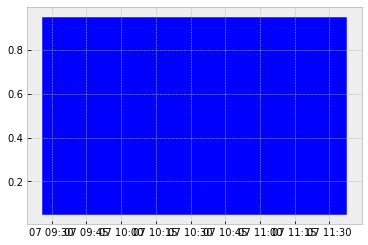

In [20]:
good_sections = boiler_meter.good_sections(full_results=True)
good_sections.plot()

Los fragmentos azules muestran dónde son buenos los datos. Una brecha blanca seria en datos incompletos en los datos de potencia bruta. Teoriacamente podria habermuchos huecos más pequeños que no podemos ver en este nivel de zoom.

También podemos ver las secciones exactas identificadas:

In [21]:
good_sections.combined()

[TimeFrame(start='2022-11-07 10:25:50+01:00', end='2022-11-07 12:37:15+01:00', empty=False)]

## Dropout rate (tasa de deserción )

Además de que puede aparecer grandes lagunas debido a que todo el sistema está inactivo, también podemo teners pequeñas lagunas frecuentes debido a que algunos sensores  arrojan datos. A esto a veces se le llama "abandono". La tasa de abandono es un número entre 0 y 1 que especifica la proporción de muestras que faltan. Una tasa de abandono de 0 significa que no faltan muestras. Un valor de 1 significaría que faltan todas las muestras:

In [22]:
boiler_meter.dropout_rate()

0.0

## Seleccion de subgrupos de medidores

Usamos ElecMeter.select_using_appliances () para seleccionar un nuevo MeterGroup usando un campo de metadatos. Por ejemplo, para obtener todas los ventiladore del conjunto de datos DSUALMH::

In [23]:
import nilmtk
nilmtk.global_meter_group.select_using_appliances(type='fan')

MeterGroup(meters=
  ElecMeter(instance=9, building=1, dataset='dsualmh', appliances=[Appliance(type='fan', instance=1)])
)

O seleccione varios tipos de aparatos:

In [24]:
elec.select_using_appliances(type=['television', 'fan'])

MeterGroup(meters=
  ElecMeter(instance=4, building=1, dataset='dsualmh', appliances=[Appliance(type='television', instance=1)])
  ElecMeter(instance=9, building=1, dataset='dsualmh', appliances=[Appliance(type='fan', instance=1)])
)

O todos los electrodomésticos del edificio 1 con motor de inducción monofásico (!):

In [25]:
nilmtk.global_meter_group.select_using_appliances(building=1, category='single-phase induction motor')

MeterGroup(meters=
  ElecMeter(instance=2, building=1, dataset='dsualmh', appliances=[Appliance(type='electric furnace', instance=1)])
  ElecMeter(instance=6, building=1, dataset='dsualmh', appliances=[Appliance(type='vacuum cleaner', instance=1)])
  ElecMeter(instance=9, building=1, dataset='dsualmh', appliances=[Appliance(type='fan', instance=1)])
  ElecMeter(instance=10, building=1, dataset='dsualmh', appliances=[Appliance(type='fridge', instance=1)])
  ElecMeter(instance=11, building=1, dataset='dsualmh', appliances=[Appliance(type='freezer', instance=1)])
)

(NILMTK importa los 'metadatos comunes' del proyecto de metadatos NILM, que incluye una amplia gama de taxonomías de diferentes categorías)(http://nilm-metadata.readthedocs.org/en/latest/central_metadata.html#appliancetype))

## Medidas disponibles para cada medidor exceptuando la potencia

In [26]:
elec.available_physical_quantities() #todas las medidas del MeterGroup

['pf', 'power', 'current', 'voltage', 'frequency']

In [27]:
elec[1].available_physical_quantities() #medidas de ElecMeter 1 (mains)



['pf', 'power', 'current', 'voltage', 'frequency']

In [28]:
elec[2].available_physical_quantities() #medidas de ElecMeter 2 (horno)


['pf', 'power', 'current', 'voltage', 'frequency']

In [29]:
elec[3].available_physical_quantities() #medidas de ElecMeter 3 (micro)


['pf', 'power', 'current', 'voltage', 'frequency']

In [30]:
elec[4].available_physical_quantities() #medidas de ElecMeter 4 (tv)


['pf', 'power', 'current', 'voltage', 'frequency']

In [31]:
elec[5].available_physical_quantities() #medidas de ElecMeter 5 (hervidor)


['pf', 'power', 'current', 'voltage', 'frequency']

In [32]:
elec[6].available_physical_quantities() #medidas de ElecMeter 6 (aspiradora)


['pf', 'power', 'current', 'voltage', 'frequency']

In [33]:
elec[7].available_physical_quantities() #medidas de ElecMeter 7 (estufa aceite)

['pf', 'power', 'current', 'voltage', 'frequency']

In [34]:
elec[8].available_physical_quantities() #medidas de ElecMeter 8 (calentador)

['pf', 'power', 'current', 'voltage', 'frequency']

In [35]:
elec[9].available_physical_quantities() #medidas de ElecMeter 9 (ventilador)

['pf', 'power', 'current', 'voltage', 'frequency']

In [36]:
elec[10].available_physical_quantities() #medidas de ElecMeter 10 (nevera)

['pf', 'power', 'current', 'voltage', 'frequency']

In [37]:
elec[11].available_physical_quantities() #medidas de ElecMeter 6 (congelaador)

['pf', 'power', 'current', 'voltage', 'frequency']

## Medidas disponibles relativas a la potencia


In [38]:
elec[1].available_ac_types('power') #medidas de potencia de ElecMeter 1 

['active',
 'apparent',
 'reactive',
 'armonic1',
 'armonic2',
 'armonic3',
 'armonic4',
 'armonic5',
 'armonic6',
 'armonic7',
 'armonic8',
 'armonic9',
 'armonic10',
 'armonic11',
 'armonic12',
 'armonic13',
 'armonic14',
 'armonic15',
 'armonic16',
 'armonic17',
 'armonic18',
 'armonic19',
 'armonic20',
 'armonic21',
 'armonic22',
 'armonic23',
 'armonic24',
 'armonic25',
 'armonic26',
 'armonic27',
 'armonic28',
 'armonic29',
 'armonic30',
 'armonic31',
 'armonic32',
 'armonic33',
 'armonic34',
 'armonic35',
 'armonic36',
 'armonic37',
 'armonic38',
 'armonic39',
 'armonic40',
 'armonic41',
 'armonic42',
 'armonic43',
 'armonic44',
 'armonic45',
 'armonic46',
 'armonic47',
 'armonic48',
 'armonic49',
 'armonic50']

In [39]:
elec[2].available_ac_types('power') #medidas de potencia de ElecMeter 2

['active',
 'apparent',
 'reactive',
 'armonic1',
 'armonic2',
 'armonic3',
 'armonic4',
 'armonic5',
 'armonic6',
 'armonic7',
 'armonic8',
 'armonic9',
 'armonic10',
 'armonic11',
 'armonic12',
 'armonic13',
 'armonic14',
 'armonic15',
 'armonic16',
 'armonic17',
 'armonic18',
 'armonic19',
 'armonic20',
 'armonic21',
 'armonic22',
 'armonic23',
 'armonic24',
 'armonic25',
 'armonic26',
 'armonic27',
 'armonic28',
 'armonic29',
 'armonic30',
 'armonic31',
 'armonic32',
 'armonic33',
 'armonic34',
 'armonic35',
 'armonic36',
 'armonic37',
 'armonic38',
 'armonic39',
 'armonic40',
 'armonic41',
 'armonic42',
 'armonic43',
 'armonic44',
 'armonic45',
 'armonic46',
 'armonic47',
 'armonic48',
 'armonic49',
 'armonic50']

In [40]:
elec[3].available_ac_types('power') #medidas de potencia de ElecMeter 3

['active',
 'apparent',
 'reactive',
 'armonic1',
 'armonic2',
 'armonic3',
 'armonic4',
 'armonic5',
 'armonic6',
 'armonic7',
 'armonic8',
 'armonic9',
 'armonic10',
 'armonic11',
 'armonic12',
 'armonic13',
 'armonic14',
 'armonic15',
 'armonic16',
 'armonic17',
 'armonic18',
 'armonic19',
 'armonic20',
 'armonic21',
 'armonic22',
 'armonic23',
 'armonic24',
 'armonic25',
 'armonic26',
 'armonic27',
 'armonic28',
 'armonic29',
 'armonic30',
 'armonic31',
 'armonic32',
 'armonic33',
 'armonic34',
 'armonic35',
 'armonic36',
 'armonic37',
 'armonic38',
 'armonic39',
 'armonic40',
 'armonic41',
 'armonic42',
 'armonic43',
 'armonic44',
 'armonic45',
 'armonic46',
 'armonic47',
 'armonic48',
 'armonic49',
 'armonic50']

In [41]:
elec[4].available_ac_types('power') #medidas de potencia de ElecMeter 4

['active',
 'apparent',
 'reactive',
 'armonic1',
 'armonic2',
 'armonic3',
 'armonic4',
 'armonic5',
 'armonic6',
 'armonic7',
 'armonic8',
 'armonic9',
 'armonic10',
 'armonic11',
 'armonic12',
 'armonic13',
 'armonic14',
 'armonic15',
 'armonic16',
 'armonic17',
 'armonic18',
 'armonic19',
 'armonic20',
 'armonic21',
 'armonic22',
 'armonic23',
 'armonic24',
 'armonic25',
 'armonic26',
 'armonic27',
 'armonic28',
 'armonic29',
 'armonic30',
 'armonic31',
 'armonic32',
 'armonic33',
 'armonic34',
 'armonic35',
 'armonic36',
 'armonic37',
 'armonic38',
 'armonic39',
 'armonic40',
 'armonic41',
 'armonic42',
 'armonic43',
 'armonic44',
 'armonic45',
 'armonic46',
 'armonic47',
 'armonic48',
 'armonic49',
 'armonic50']

In [42]:
elec[5].available_ac_types('power') #medidas de potencia de ElecMeter 5

['active',
 'apparent',
 'reactive',
 'armonic1',
 'armonic2',
 'armonic3',
 'armonic4',
 'armonic5',
 'armonic6',
 'armonic7',
 'armonic8',
 'armonic9',
 'armonic10',
 'armonic11',
 'armonic12',
 'armonic13',
 'armonic14',
 'armonic15',
 'armonic16',
 'armonic17',
 'armonic18',
 'armonic19',
 'armonic20',
 'armonic21',
 'armonic22',
 'armonic23',
 'armonic24',
 'armonic25',
 'armonic26',
 'armonic27',
 'armonic28',
 'armonic29',
 'armonic30',
 'armonic31',
 'armonic32',
 'armonic33',
 'armonic34',
 'armonic35',
 'armonic36',
 'armonic37',
 'armonic38',
 'armonic39',
 'armonic40',
 'armonic41',
 'armonic42',
 'armonic43',
 'armonic44',
 'armonic45',
 'armonic46',
 'armonic47',
 'armonic48',
 'armonic49',
 'armonic50']

In [43]:
elec[6].available_ac_types('power') #medidas de potencia de ElecMeter 6

['active',
 'apparent',
 'reactive',
 'armonic1',
 'armonic2',
 'armonic3',
 'armonic4',
 'armonic5',
 'armonic6',
 'armonic7',
 'armonic8',
 'armonic9',
 'armonic10',
 'armonic11',
 'armonic12',
 'armonic13',
 'armonic14',
 'armonic15',
 'armonic16',
 'armonic17',
 'armonic18',
 'armonic19',
 'armonic20',
 'armonic21',
 'armonic22',
 'armonic23',
 'armonic24',
 'armonic25',
 'armonic26',
 'armonic27',
 'armonic28',
 'armonic29',
 'armonic30',
 'armonic31',
 'armonic32',
 'armonic33',
 'armonic34',
 'armonic35',
 'armonic36',
 'armonic37',
 'armonic38',
 'armonic39',
 'armonic40',
 'armonic41',
 'armonic42',
 'armonic43',
 'armonic44',
 'armonic45',
 'armonic46',
 'armonic47',
 'armonic48',
 'armonic49',
 'armonic50']

In [44]:
elec[7].available_ac_types('power') #medidas de potencia de ElecMeter 7

['active',
 'apparent',
 'reactive',
 'armonic1',
 'armonic2',
 'armonic3',
 'armonic4',
 'armonic5',
 'armonic6',
 'armonic7',
 'armonic8',
 'armonic9',
 'armonic10',
 'armonic11',
 'armonic12',
 'armonic13',
 'armonic14',
 'armonic15',
 'armonic16',
 'armonic17',
 'armonic18',
 'armonic19',
 'armonic20',
 'armonic21',
 'armonic22',
 'armonic23',
 'armonic24',
 'armonic25',
 'armonic26',
 'armonic27',
 'armonic28',
 'armonic29',
 'armonic30',
 'armonic31',
 'armonic32',
 'armonic33',
 'armonic34',
 'armonic35',
 'armonic36',
 'armonic37',
 'armonic38',
 'armonic39',
 'armonic40',
 'armonic41',
 'armonic42',
 'armonic43',
 'armonic44',
 'armonic45',
 'armonic46',
 'armonic47',
 'armonic48',
 'armonic49',
 'armonic50']

In [45]:
elec[8].available_ac_types('power') #medidas de potencia de ElecMeter 8

['active',
 'apparent',
 'reactive',
 'armonic1',
 'armonic2',
 'armonic3',
 'armonic4',
 'armonic5',
 'armonic6',
 'armonic7',
 'armonic8',
 'armonic9',
 'armonic10',
 'armonic11',
 'armonic12',
 'armonic13',
 'armonic14',
 'armonic15',
 'armonic16',
 'armonic17',
 'armonic18',
 'armonic19',
 'armonic20',
 'armonic21',
 'armonic22',
 'armonic23',
 'armonic24',
 'armonic25',
 'armonic26',
 'armonic27',
 'armonic28',
 'armonic29',
 'armonic30',
 'armonic31',
 'armonic32',
 'armonic33',
 'armonic34',
 'armonic35',
 'armonic36',
 'armonic37',
 'armonic38',
 'armonic39',
 'armonic40',
 'armonic41',
 'armonic42',
 'armonic43',
 'armonic44',
 'armonic45',
 'armonic46',
 'armonic47',
 'armonic48',
 'armonic49',
 'armonic50']

In [46]:
elec[9].available_ac_types('power') #medidas de potencia de ElecMeter 9

['active',
 'apparent',
 'reactive',
 'armonic1',
 'armonic2',
 'armonic3',
 'armonic4',
 'armonic5',
 'armonic6',
 'armonic7',
 'armonic8',
 'armonic9',
 'armonic10',
 'armonic11',
 'armonic12',
 'armonic13',
 'armonic14',
 'armonic15',
 'armonic16',
 'armonic17',
 'armonic18',
 'armonic19',
 'armonic20',
 'armonic21',
 'armonic22',
 'armonic23',
 'armonic24',
 'armonic25',
 'armonic26',
 'armonic27',
 'armonic28',
 'armonic29',
 'armonic30',
 'armonic31',
 'armonic32',
 'armonic33',
 'armonic34',
 'armonic35',
 'armonic36',
 'armonic37',
 'armonic38',
 'armonic39',
 'armonic40',
 'armonic41',
 'armonic42',
 'armonic43',
 'armonic44',
 'armonic45',
 'armonic46',
 'armonic47',
 'armonic48',
 'armonic49',
 'armonic50']

In [47]:
elec[10].available_ac_types('power') #medidas de potencia de ElecMeter 10

['active',
 'apparent',
 'reactive',
 'armonic1',
 'armonic2',
 'armonic3',
 'armonic4',
 'armonic5',
 'armonic6',
 'armonic7',
 'armonic8',
 'armonic9',
 'armonic10',
 'armonic11',
 'armonic12',
 'armonic13',
 'armonic14',
 'armonic15',
 'armonic16',
 'armonic17',
 'armonic18',
 'armonic19',
 'armonic20',
 'armonic21',
 'armonic22',
 'armonic23',
 'armonic24',
 'armonic25',
 'armonic26',
 'armonic27',
 'armonic28',
 'armonic29',
 'armonic30',
 'armonic31',
 'armonic32',
 'armonic33',
 'armonic34',
 'armonic35',
 'armonic36',
 'armonic37',
 'armonic38',
 'armonic39',
 'armonic40',
 'armonic41',
 'armonic42',
 'armonic43',
 'armonic44',
 'armonic45',
 'armonic46',
 'armonic47',
 'armonic48',
 'armonic49',
 'armonic50']

In [48]:
elec[11].available_ac_types('power') #medidas de potencia de ElecMeter 11

['active',
 'apparent',
 'reactive',
 'armonic1',
 'armonic2',
 'armonic3',
 'armonic4',
 'armonic5',
 'armonic6',
 'armonic7',
 'armonic8',
 'armonic9',
 'armonic10',
 'armonic11',
 'armonic12',
 'armonic13',
 'armonic14',
 'armonic15',
 'armonic16',
 'armonic17',
 'armonic18',
 'armonic19',
 'armonic20',
 'armonic21',
 'armonic22',
 'armonic23',
 'armonic24',
 'armonic25',
 'armonic26',
 'armonic27',
 'armonic28',
 'armonic29',
 'armonic30',
 'armonic31',
 'armonic32',
 'armonic33',
 'armonic34',
 'armonic35',
 'armonic36',
 'armonic37',
 'armonic38',
 'armonic39',
 'armonic40',
 'armonic41',
 'armonic42',
 'armonic43',
 'armonic44',
 'armonic45',
 'armonic46',
 'armonic47',
 'armonic48',
 'armonic49',
 'armonic50']

Del atributo 'elec' se puede obtener información de los medidores

En caso de consultar por una medición en específico, se pueden usar los siguientes tipos de mediciones tanto en ‘available_physical_quantities’ como en ‘available_ac_types’: 'power', 'energy', 'cumulative energy', 'voltage', 'current', 'pf', 'frequency', 'power factor', 'state', 'phase angle'.

### Medidas disponibles por electrodomestico o aparato

Podemos  ver las medidas desde otro punto de vista

Veamos qué medidas tenemos para el frigorífico,hervidor,luz,tv,etc:

In [49]:
freezer = elec['fan']
freezer.available_columns()

[('voltage', 'armonic42'),
 ('power', 'armonic4'),
 ('power', 'armonic42'),
 ('voltage', 'armonic28'),
 ('current', 'armonic16'),
 ('current', 'armonic17'),
 ('current', 'armonic42'),
 ('voltage', 'armonic25'),
 ('voltage', 'armonic38'),
 ('current', 'armonic23'),
 ('current', 'armonic34'),
 ('current', 'armonic5'),
 ('current', 'armonic12'),
 ('power', 'armonic21'),
 ('power', 'armonic31'),
 ('current', 'armonic7'),
 ('voltage', 'armonic17'),
 ('current', 'armonic26'),
 ('power', 'armonic8'),
 ('voltage', None),
 ('current', 'armonic45'),
 ('current', 'armonic48'),
 ('current', 'armonic24'),
 ('voltage', 'armonic6'),
 ('power', 'armonic39'),
 ('voltage', 'armonic26'),
 ('current', 'armonic40'),
 ('power', 'armonic17'),
 ('current', 'armonic28'),
 ('power', 'armonic18'),
 ('voltage', 'armonic37'),
 ('voltage', 'armonic48'),
 ('current', 'armonic39'),
 ('current', 'armonic38'),
 ('power', 'armonic3'),
 ('current', 'armonic27'),
 ('current', 'armonic1'),
 ('voltage', 'armonic22'),
 ('pow

In [50]:
boiler = elec['kettle']
boiler.available_columns()

[('voltage', 'armonic42'),
 ('power', 'armonic4'),
 ('power', 'armonic42'),
 ('voltage', 'armonic28'),
 ('current', 'armonic16'),
 ('current', 'armonic17'),
 ('current', 'armonic42'),
 ('voltage', 'armonic25'),
 ('voltage', 'armonic38'),
 ('current', 'armonic23'),
 ('current', 'armonic34'),
 ('current', 'armonic5'),
 ('current', 'armonic12'),
 ('power', 'armonic21'),
 ('power', 'armonic31'),
 ('current', 'armonic7'),
 ('voltage', 'armonic17'),
 ('current', 'armonic26'),
 ('power', 'armonic8'),
 ('voltage', None),
 ('current', 'armonic45'),
 ('current', 'armonic48'),
 ('current', 'armonic24'),
 ('voltage', 'armonic6'),
 ('power', 'armonic39'),
 ('voltage', 'armonic26'),
 ('current', 'armonic40'),
 ('power', 'armonic17'),
 ('current', 'armonic28'),
 ('power', 'armonic18'),
 ('voltage', 'armonic37'),
 ('voltage', 'armonic48'),
 ('current', 'armonic39'),
 ('current', 'armonic38'),
 ('power', 'armonic3'),
 ('current', 'armonic27'),
 ('current', 'armonic1'),
 ('voltage', 'armonic22'),
 ('pow

In [51]:
fan = elec['fan']
fan.available_columns()

[('voltage', 'armonic42'),
 ('power', 'armonic4'),
 ('power', 'armonic42'),
 ('voltage', 'armonic28'),
 ('current', 'armonic16'),
 ('current', 'armonic17'),
 ('current', 'armonic42'),
 ('voltage', 'armonic25'),
 ('voltage', 'armonic38'),
 ('current', 'armonic23'),
 ('current', 'armonic34'),
 ('current', 'armonic5'),
 ('current', 'armonic12'),
 ('power', 'armonic21'),
 ('power', 'armonic31'),
 ('current', 'armonic7'),
 ('voltage', 'armonic17'),
 ('current', 'armonic26'),
 ('power', 'armonic8'),
 ('voltage', None),
 ('current', 'armonic45'),
 ('current', 'armonic48'),
 ('current', 'armonic24'),
 ('voltage', 'armonic6'),
 ('power', 'armonic39'),
 ('voltage', 'armonic26'),
 ('current', 'armonic40'),
 ('power', 'armonic17'),
 ('current', 'armonic28'),
 ('power', 'armonic18'),
 ('voltage', 'armonic37'),
 ('voltage', 'armonic48'),
 ('current', 'armonic39'),
 ('current', 'armonic38'),
 ('power', 'armonic3'),
 ('current', 'armonic27'),
 ('current', 'armonic1'),
 ('voltage', 'armonic22'),
 ('pow

In [52]:
television = elec['television']
television.available_columns()

[('voltage', 'armonic42'),
 ('power', 'armonic4'),
 ('power', 'armonic42'),
 ('voltage', 'armonic28'),
 ('current', 'armonic16'),
 ('current', 'armonic17'),
 ('current', 'armonic42'),
 ('voltage', 'armonic25'),
 ('voltage', 'armonic38'),
 ('current', 'armonic23'),
 ('current', 'armonic34'),
 ('current', 'armonic5'),
 ('current', 'armonic12'),
 ('power', 'armonic21'),
 ('power', 'armonic31'),
 ('current', 'armonic7'),
 ('voltage', 'armonic17'),
 ('current', 'armonic26'),
 ('power', 'armonic8'),
 ('voltage', None),
 ('current', 'armonic45'),
 ('current', 'armonic48'),
 ('current', 'armonic24'),
 ('voltage', 'armonic6'),
 ('power', 'armonic39'),
 ('voltage', 'armonic26'),
 ('current', 'armonic40'),
 ('power', 'armonic17'),
 ('current', 'armonic28'),
 ('power', 'armonic18'),
 ('voltage', 'armonic37'),
 ('voltage', 'armonic48'),
 ('current', 'armonic39'),
 ('current', 'armonic38'),
 ('power', 'armonic3'),
 ('current', 'armonic27'),
 ('current', 'armonic1'),
 ('voltage', 'armonic22'),
 ('pow

In [53]:
vacuum_cleaner = elec['vacuum cleaner']
vacuum_cleaner.available_columns()

[('voltage', 'armonic42'),
 ('power', 'armonic4'),
 ('power', 'armonic42'),
 ('voltage', 'armonic28'),
 ('current', 'armonic16'),
 ('current', 'armonic17'),
 ('current', 'armonic42'),
 ('voltage', 'armonic25'),
 ('voltage', 'armonic38'),
 ('current', 'armonic23'),
 ('current', 'armonic34'),
 ('current', 'armonic5'),
 ('current', 'armonic12'),
 ('power', 'armonic21'),
 ('power', 'armonic31'),
 ('current', 'armonic7'),
 ('voltage', 'armonic17'),
 ('current', 'armonic26'),
 ('power', 'armonic8'),
 ('voltage', None),
 ('current', 'armonic45'),
 ('current', 'armonic48'),
 ('current', 'armonic24'),
 ('voltage', 'armonic6'),
 ('power', 'armonic39'),
 ('voltage', 'armonic26'),
 ('current', 'armonic40'),
 ('power', 'armonic17'),
 ('current', 'armonic28'),
 ('power', 'armonic18'),
 ('voltage', 'armonic37'),
 ('voltage', 'armonic48'),
 ('current', 'armonic39'),
 ('current', 'armonic38'),
 ('power', 'armonic3'),
 ('current', 'armonic27'),
 ('current', 'armonic1'),
 ('voltage', 'armonic22'),
 ('pow

In [54]:
microwave = elec['microwave']
microwave.available_columns()

[('voltage', 'armonic42'),
 ('power', 'armonic4'),
 ('power', 'armonic42'),
 ('voltage', 'armonic28'),
 ('current', 'armonic16'),
 ('current', 'armonic17'),
 ('current', 'armonic42'),
 ('voltage', 'armonic25'),
 ('voltage', 'armonic38'),
 ('current', 'armonic23'),
 ('current', 'armonic34'),
 ('current', 'armonic5'),
 ('current', 'armonic12'),
 ('power', 'armonic21'),
 ('power', 'armonic31'),
 ('current', 'armonic7'),
 ('voltage', 'armonic17'),
 ('current', 'armonic26'),
 ('power', 'armonic8'),
 ('voltage', None),
 ('current', 'armonic45'),
 ('current', 'armonic48'),
 ('current', 'armonic24'),
 ('voltage', 'armonic6'),
 ('power', 'armonic39'),
 ('voltage', 'armonic26'),
 ('current', 'armonic40'),
 ('power', 'armonic17'),
 ('current', 'armonic28'),
 ('power', 'armonic18'),
 ('voltage', 'armonic37'),
 ('voltage', 'armonic48'),
 ('current', 'armonic39'),
 ('current', 'armonic38'),
 ('power', 'armonic3'),
 ('current', 'armonic27'),
 ('current', 'armonic1'),
 ('voltage', 'armonic22'),
 ('pow

In [55]:
electric_furnace = elec['electric furnace']
electric_furnace.available_columns()

[('voltage', 'armonic42'),
 ('power', 'armonic4'),
 ('power', 'armonic42'),
 ('voltage', 'armonic28'),
 ('current', 'armonic16'),
 ('current', 'armonic17'),
 ('current', 'armonic42'),
 ('voltage', 'armonic25'),
 ('voltage', 'armonic38'),
 ('current', 'armonic23'),
 ('current', 'armonic34'),
 ('current', 'armonic5'),
 ('current', 'armonic12'),
 ('power', 'armonic21'),
 ('power', 'armonic31'),
 ('current', 'armonic7'),
 ('voltage', 'armonic17'),
 ('current', 'armonic26'),
 ('power', 'armonic8'),
 ('voltage', None),
 ('current', 'armonic45'),
 ('current', 'armonic48'),
 ('current', 'armonic24'),
 ('voltage', 'armonic6'),
 ('power', 'armonic39'),
 ('voltage', 'armonic26'),
 ('current', 'armonic40'),
 ('power', 'armonic17'),
 ('current', 'armonic28'),
 ('power', 'armonic18'),
 ('voltage', 'armonic37'),
 ('voltage', 'armonic48'),
 ('current', 'armonic39'),
 ('current', 'armonic38'),
 ('power', 'armonic3'),
 ('current', 'armonic27'),
 ('current', 'armonic1'),
 ('voltage', 'armonic22'),
 ('pow

In [56]:
electric_space_heater = elec['electric space heater']
electric_space_heater.available_columns()

[('voltage', 'armonic42'),
 ('power', 'armonic4'),
 ('power', 'armonic42'),
 ('voltage', 'armonic28'),
 ('current', 'armonic16'),
 ('current', 'armonic17'),
 ('current', 'armonic42'),
 ('voltage', 'armonic25'),
 ('voltage', 'armonic38'),
 ('current', 'armonic23'),
 ('current', 'armonic34'),
 ('current', 'armonic5'),
 ('current', 'armonic12'),
 ('power', 'armonic21'),
 ('power', 'armonic31'),
 ('current', 'armonic7'),
 ('voltage', 'armonic17'),
 ('current', 'armonic26'),
 ('power', 'armonic8'),
 ('voltage', None),
 ('current', 'armonic45'),
 ('current', 'armonic48'),
 ('current', 'armonic24'),
 ('voltage', 'armonic6'),
 ('power', 'armonic39'),
 ('voltage', 'armonic26'),
 ('current', 'armonic40'),
 ('power', 'armonic17'),
 ('current', 'armonic28'),
 ('power', 'armonic18'),
 ('voltage', 'armonic37'),
 ('voltage', 'armonic48'),
 ('current', 'armonic39'),
 ('current', 'armonic38'),
 ('power', 'armonic3'),
 ('current', 'armonic27'),
 ('current', 'armonic1'),
 ('voltage', 'armonic22'),
 ('pow

In [57]:
electric_shower_heater = elec['electric shower heater']
electric_shower_heater.available_columns()

[('voltage', 'armonic42'),
 ('power', 'armonic4'),
 ('power', 'armonic42'),
 ('voltage', 'armonic28'),
 ('current', 'armonic16'),
 ('current', 'armonic17'),
 ('current', 'armonic42'),
 ('voltage', 'armonic25'),
 ('voltage', 'armonic38'),
 ('current', 'armonic23'),
 ('current', 'armonic34'),
 ('current', 'armonic5'),
 ('current', 'armonic12'),
 ('power', 'armonic21'),
 ('power', 'armonic31'),
 ('current', 'armonic7'),
 ('voltage', 'armonic17'),
 ('current', 'armonic26'),
 ('power', 'armonic8'),
 ('voltage', None),
 ('current', 'armonic45'),
 ('current', 'armonic48'),
 ('current', 'armonic24'),
 ('voltage', 'armonic6'),
 ('power', 'armonic39'),
 ('voltage', 'armonic26'),
 ('current', 'armonic40'),
 ('power', 'armonic17'),
 ('current', 'armonic28'),
 ('power', 'armonic18'),
 ('voltage', 'armonic37'),
 ('voltage', 'armonic48'),
 ('current', 'armonic39'),
 ('current', 'armonic38'),
 ('power', 'armonic3'),
 ('current', 'armonic27'),
 ('current', 'armonic1'),
 ('voltage', 'armonic22'),
 ('pow

In [58]:
fridge = elec[10]
fridge.available_columns()

[('voltage', 'armonic42'),
 ('power', 'armonic4'),
 ('power', 'armonic42'),
 ('voltage', 'armonic28'),
 ('current', 'armonic16'),
 ('current', 'armonic17'),
 ('current', 'armonic42'),
 ('voltage', 'armonic25'),
 ('voltage', 'armonic38'),
 ('current', 'armonic23'),
 ('current', 'armonic34'),
 ('current', 'armonic5'),
 ('current', 'armonic12'),
 ('power', 'armonic21'),
 ('power', 'armonic31'),
 ('current', 'armonic7'),
 ('voltage', 'armonic17'),
 ('current', 'armonic26'),
 ('power', 'armonic8'),
 ('voltage', None),
 ('current', 'armonic45'),
 ('current', 'armonic48'),
 ('current', 'armonic24'),
 ('voltage', 'armonic6'),
 ('power', 'armonic39'),
 ('voltage', 'armonic26'),
 ('current', 'armonic40'),
 ('power', 'armonic17'),
 ('current', 'armonic28'),
 ('power', 'armonic18'),
 ('voltage', 'armonic37'),
 ('voltage', 'armonic48'),
 ('current', 'armonic39'),
 ('current', 'armonic38'),
 ('power', 'armonic3'),
 ('current', 'armonic27'),
 ('current', 'armonic1'),
 ('voltage', 'armonic22'),
 ('pow

In [59]:
freezer = elec[11]
freezer.available_columns()

[('voltage', 'armonic42'),
 ('power', 'armonic4'),
 ('power', 'armonic42'),
 ('voltage', 'armonic28'),
 ('current', 'armonic16'),
 ('current', 'armonic17'),
 ('current', 'armonic42'),
 ('voltage', 'armonic25'),
 ('voltage', 'armonic38'),
 ('current', 'armonic23'),
 ('current', 'armonic34'),
 ('current', 'armonic5'),
 ('current', 'armonic12'),
 ('power', 'armonic21'),
 ('power', 'armonic31'),
 ('current', 'armonic7'),
 ('voltage', 'armonic17'),
 ('current', 'armonic26'),
 ('power', 'armonic8'),
 ('voltage', None),
 ('current', 'armonic45'),
 ('current', 'armonic48'),
 ('current', 'armonic24'),
 ('voltage', 'armonic6'),
 ('power', 'armonic39'),
 ('voltage', 'armonic26'),
 ('current', 'armonic40'),
 ('power', 'armonic17'),
 ('current', 'armonic28'),
 ('power', 'armonic18'),
 ('voltage', 'armonic37'),
 ('voltage', 'armonic48'),
 ('current', 'armonic39'),
 ('current', 'armonic38'),
 ('power', 'armonic3'),
 ('current', 'armonic27'),
 ('current', 'armonic1'),
 ('voltage', 'armonic22'),
 ('pow

## Resumen de mediciones

Ahora veamos un resumen de las medidas disponibles por cada medidor

In [60]:
print('Mediciones disponibles - Dataset: '+str(elec.available_physical_quantities()))
print('Mediciones de Potencia disponibles - Dataset: '+str(elec.available_ac_types('power')))

print('\nMedidas disponibles por cada medidor:')
for x in range(len(labels)):
    print(str(labels['Meters'][x])+': '+str(elec[x+1].available_physical_quantities()))

print('\nMedidas de potencia por cada medidor:')  
for x in range(len(labels)):
    print(str(labels['Meters'][x])+': '+str(elec[x+1].available_ac_types('power')))

Mediciones disponibles - Dataset: ['pf', 'power', 'current', 'voltage', 'frequency']
Mediciones de Potencia disponibles - Dataset: ['armonic17', 'armonic25', 'armonic1', 'armonic41', 'armonic36', 'armonic9', 'armonic14', 'armonic39', 'armonic42', 'armonic16', 'reactive', 'armonic3', 'armonic26', 'armonic50', 'armonic8', 'armonic37', 'armonic11', 'armonic23', 'armonic21', 'armonic27', 'armonic31', 'armonic34', 'armonic47', 'armonic48', 'armonic13', 'armonic29', 'armonic6', 'armonic40', 'armonic49', 'armonic30', 'armonic32', 'armonic46', 'armonic5', 'armonic12', 'armonic18', 'armonic20', 'armonic24', 'armonic22', 'armonic28', 'armonic7', 'armonic38', 'armonic44', 'armonic15', 'armonic4', 'apparent', 'armonic10', 'armonic19', 'armonic35', 'armonic45', 'armonic2', 'active', 'armonic33', 'armonic43']

Medidas disponibles por cada medidor:
Main: ['pf', 'power', 'current', 'voltage', 'frequency']
Electric furnace: ['pf', 'power', 'current', 'voltage', 'frequency']
Microwave: ['pf', 'power', '

Los dispositivos se identifican de forma única dentro de un edificio por un tipo (luces, televisión, etc.) y un número de instancia. Si no se especifica un número de instancia, ElecMeter recupera la instancia 1.

### Esquema de red

In [61]:
 def draw_wiring_graph_2(self, show_meter_labels=True):
        graph = self.wiring_graph()
        
        try:
            # Try using graphviz layout...
            pos = nx.drawing.nx_agraph.graphviz_layout(graph, prog='dot')
            used_graphviz = True
        except:
            # ...and fallback to shell layout if graphviz is not installed or
            # doesn't work
            pos = nx.shell_layout(graph)
            used_graphviz = False
            
        meter_labels = {}
        if show_meter_labels:
            meter_labels = {meter: meter.label() for meter in graph.nodes()}
            for meter, name in meter_labels.items():
                x, y = pos[meter]

                if used_graphviz:
                    if meter.is_site_meter():
                        delta_y = 5
                    else:
                        delta_y = -5
                    
                    plt.text(x, y + delta_y, s=name, bbox=dict(facecolor='red', alpha=0.5), horizontalalignment='center')
       

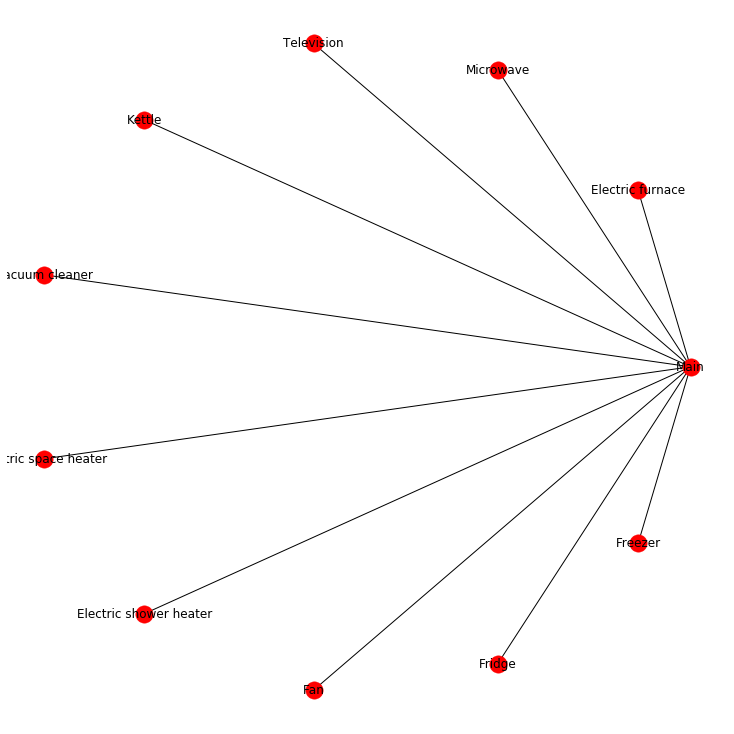

In [62]:
rcParams['figure.figsize'] = (10, 10)
fig = elec.draw_wiring_graph_2(show_meter_labels=False)
#fig = elec.draw_wiring_graph(show_meter_labels=False)

#etiquetas, opcional
pos = nx.shell_layout(fig[0])
nx.draw_networkx_labels(fig[0], pos, labels=Meters)

#guarda gráfico
plt.savefig('./data/images/2.1_Network.svg', bbox_inches='tight', transparent=True)
pass

NOTA: La funcion draw_wiring_graph  presenta problemas con Matplotlib 3.3.0 (y por tanto con NILMTK) segun issue 868 ( https://github.com/nilmtk/nilmtk/issues/868)), por lo que necesitamos reemplazar la función original para poder representar graficamente correctamente las etiquetas, por lo que vamos a crear la nueva funcion elec.draw_wiring_graph_2 que guardaremos en la ruta \user\USUARIO\anaconda3\envs\nilmtk-env\Lib\site-packages\nilmtk\metergroup.py

## Carga de datos en memoria

Intervalos de tiempo en que se registran datos: `elec[1]`

Timestamp en "timezone" es  "Europe/Madrid" https://www.epochconverter.com/

In [63]:
elec.get_timeframe()

TimeFrame(start='2022-11-07 10:25:50+01:00', end='2022-11-07 12:37:15+01:00', empty=False)

Una manera rápida de cargar varios datos de medidores en un DataFrame es utilizar la función `dataframe_of_meters` e indicar cual medida se desea importar desde el MeterGroup.

Observese que solo podemos tomar datos de potencia :active', 'apparent', 'reactive'.




Vamos a mostrar la potencia activa de los medidores del 2 al 11 (es decir todos menos el principal). 

In [64]:
Devices = elec.select(instance=[2,3,4,5,6,7,8,9,10,11])  #nuevo MeterGroup de dispositivos
df = Devices.dataframe_of_meters(ac_type='active') # active crea Dataframe badado en la potencia Valid AC types = ['active', 'apparent', 'reactive'].
#etiquetas
df.columns = [list(labels['Meters'][1:12])]
df

,Electric furnace,Microwave,Television,Kettle,Vacuum cleaner,Electric space heater,Electric shower heater,Fan,Fridge,Freezer
2022-11-07 10:25:00+01:00,7.184515,5.171018,2.825576,7.395792,4.563028,7.188543,7.590068,6.575097,7.729356,11.271597
2022-11-07 10:26:00+01:00,1355.974976,792.033569,2.597803,5.745048,503.989532,7.281439,7.400056,6.392639,75.555763,62.804089
2022-11-07 10:27:00+01:00,2051.272461,1246.502930,2.423345,5.534465,750.579468,7.238587,7.372242,6.315014,78.540840,63.972080
2022-11-07 10:28:00+01:00,2038.523315,1232.078491,2.389324,5.471101,752.530518,7.145421,7.334353,6.348352,76.926460,66.167839
2022-11-07 10:29:00+01:00,2030.187256,1217.698730,2.477478,5.458977,735.651367,7.199955,7.358157,6.312464,74.184334,68.398697
...,...,...,...,...,...,...,...,...,...,...
2022-11-07 12:33:00+01:00,1957.348511,3.917081,NaN,6.269866,3.797471,NaN,1490.497192,38.241627,6.592444,9.848446
2022-11-07 12:34:00+01:00,1948.216064,3.904327,NaN,6.253445,3.780879,NaN,1490.507568,38.207169,6.568821,9.787971
2022-11-07 12:35:00+01:00,1941.883423,3.904507,NaN,6.221429,3.769219,NaN,1487.029785,38.138527,6.578386,9.754848
2022-11-07 12:36:00+01:00,1464.445435,4.173374,NaN,6.369139,3.956484,NaN,1119.891235,30.031176,6.751473,9.940753


Ahora veamos la potencia reactiva de los medidores del 2 al 11 (todos menos el principal).

In [65]:
Devices = elec.select(instance=[2,3,4,5,6,7,8,9,10,11])  #nuevo MeterGroup de dispositivos
df = Devices.dataframe_of_meters(ac_type='reactive') # active crea Dataframe badado en la potencia Valid AC types = ['active', 'apparent', 'reactive'].
#etiquetas
df.columns = [list(labels['Meters'][1:12])]
df

,Electric furnace,Microwave,Television,Kettle,Vacuum cleaner,Electric space heater,Electric shower heater,Fan,Fridge,Freezer
2022-11-07 10:25:00+01:00,-1.193840,-1.580966,-2.547700,-1.883101,-1.167255,-4.352417,-2.768792,-2.601079,-1.892248,-3.690412
2022-11-07 10:26:00+01:00,25.015287,248.020950,-2.329456,-2.203345,38.140797,-4.113100,-2.661955,-2.538689,12.040404,12.550424
2022-11-07 10:27:00+01:00,34.018738,332.252319,-2.260613,-1.903478,51.490265,-4.058380,-2.581341,-2.449036,8.232028,13.206454
2022-11-07 10:28:00+01:00,27.815872,297.751587,-2.280204,-1.736646,49.349163,-4.040287,-2.579894,-2.479195,8.089380,13.387150
2022-11-07 10:29:00+01:00,26.076275,274.528839,-2.274844,-1.742216,44.353176,-4.076494,-2.606638,-2.491886,7.369856,13.641544
...,...,...,...,...,...,...,...,...,...,...
2022-11-07 12:33:00+01:00,55.892570,-1.283346,NaN,-1.448994,-0.965479,NaN,1.287535,-2.107105,-1.834528,-3.331299
2022-11-07 12:34:00+01:00,55.303967,-1.328281,NaN,-1.508471,-0.946202,NaN,1.265473,-2.206153,-1.814360,-3.315053
2022-11-07 12:35:00+01:00,54.699562,-1.300408,NaN,-1.470255,-0.960806,NaN,1.232611,-2.383463,-1.817909,-3.327555
2022-11-07 12:36:00+01:00,40.765350,-1.358818,NaN,-1.503585,-0.975578,NaN,0.355890,-2.428096,-1.833623,-3.355172


Por ultimo, veamos la potencia aparente de los medidores del 2 al 11 (todos menos el principal).

In [66]:
Devices = elec.select(instance=[2,3,4,5,6,7,8,9,10,11])  #nuevo MeterGroup de dispositivos
df = Devices.dataframe_of_meters(ac_type='apparent') # active crea Dataframe badado en la potencia Valid AC types = ['active', 'apparent', 'reactive'].
#etiquetas
df.columns = [list(labels['Meters'][1:12])]
df

,Electric furnace,Microwave,Television,Kettle,Vacuum cleaner,Electric space heater,Electric shower heater,Fan,Fridge,Freezer
2022-11-07 10:25:00+01:00,7.288854,5.415025,3.812110,7.636046,4.722235,8.411257,8.084754,7.077630,7.961765,11.863559
2022-11-07 10:26:00+01:00,1356.293701,842.189087,3.544653,6.806985,505.573120,8.404842,7.869067,6.886499,77.309875,64.733780
2022-11-07 10:27:00+01:00,2051.636230,1290.133667,3.325691,6.721591,752.348938,8.307381,7.815920,6.780525,78.972008,65.322235
2022-11-07 10:28:00+01:00,2038.789307,1267.615601,3.317054,5.796281,754.155090,8.223353,7.779383,6.820901,77.351517,67.509216
2022-11-07 10:29:00+01:00,2030.434448,1248.307739,3.377684,5.819084,736.998047,8.281644,7.811003,6.794641,74.603546,69.746689
...,...,...,...,...,...,...,...,...,...,...
2022-11-07 12:33:00+01:00,1958.146240,4.132893,NaN,6.441957,3.927973,NaN,1490.497803,38.300716,6.847435,10.400258
2022-11-07 12:34:00+01:00,1949.000977,4.137153,NaN,6.446645,3.910177,NaN,1490.508057,38.272083,6.819908,10.338138
2022-11-07 12:35:00+01:00,1942.653687,4.125131,NaN,6.400969,3.901440,NaN,1487.030396,38.214157,6.829993,10.310248
2022-11-07 12:36:00+01:00,1465.040405,4.444996,NaN,6.740518,4.100001,NaN,1119.995117,30.263321,7.001396,10.505280


Se puede obtener el tipo de datos usado para cada medidor usandola clase info

In [67]:
df.info() #información del DataFrame

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 133 entries, 2022-11-07 10:25:00+01:00 to 2022-11-07 12:37:00+01:00
Freq: 60S
Data columns (total 10 columns):
(Electric furnace,)          133 non-null float32
(Microwave,)                 133 non-null float32
(Television,)                98 non-null float32
(Kettle,)                    133 non-null float32
(Vacuum cleaner,)            133 non-null float32
(Electric space heater,)     110 non-null float32
(Electric shower heater,)    133 non-null float32
(Fan,)                       133 non-null float32
(Fridge,)                    133 non-null float32
(Freezer,)                   133 non-null float32
dtypes: float32(10)
memory usage: 6.2 KB


Podemos asignar individualmente datos de medidores en un Dataframe




Vemos para el meter nº 6(Vacuum Cleaner) con datos capturados de 10:16 a 12:58 tenemos la siguinte tabla que nos muestra todas las medidas

In [68]:
t0 = '2022-11-07 10:25:50+01:00' #tiempo inicial
t1 = '2022-11-07 12:37:15+01:00' #tiempo final


df_vac = next(elec[6].load())[t0:t1] #DataFrame medidor 
df_vac

physical_quantity           voltage     power                 voltage  \
type                      armonic42  armonic4     armonic42 armonic28   
2022-11-07 10:25:50+01:00  0.006585  0.000031  1.500000e-06  0.004807   
2022-11-07 10:25:51+01:00  0.005314 -0.000006  2.000000e-07  0.006004   
2022-11-07 10:25:52+01:00  0.005140  0.000008  0.000000e+00  0.008085   
2022-11-07 10:25:53+01:00  0.008510 -0.000003  1.000000e-06  0.009817   
2022-11-07 10:25:54+01:00  0.007010  0.000010  2.000000e-07  0.005858   
...                             ...       ...           ...       ...   
2022-11-07 12:37:11+01:00  0.008969  0.000005  1.600000e-06  0.008123   
2022-11-07 12:37:12+01:00  0.011074 -0.000044  3.400000e-06  0.003977   
2022-11-07 12:37:13+01:00  0.007747 -0.000014  6.000000e-07  0.008658   
2022-11-07 12:37:14+01:00  0.012937 -0.000012  2.400000e-06  0.008949   
2022-11-07 12:37:15+01:00  0.007788 -0.000006  1.666667e-06  0.005724   

physical_quantity           current                       voltage            \
type                      armonic16 armonic17 armonic42 armonic25 armonic38   
2022-11-07 10:25:50+01:00  0.000530  0.000695  0.000223  0.014161  0.004096   
2022-11-07 10:25:51+01:00  0.000551  0.000374  0.000305  0.017804  0.007814   
2022-11-07 10:25:52+01:00  0.000461  0.000555  0.000283  0.016916  0.006564   
2022-11-07 10:25:53+01:00  0.000341  0.000555  0.000220  0.015047  0.006694   
2022-11-07 10:25:54+01:00  0.000460  0.000586  0.000355  0.023453  0.006876   
...                             ...       ...       ...       ...       ...   
2022-11-07 12:37:11+01:00  0.000776  0.000424  0.000351  0.039829  0.005048   
2022-11-07 12:37:12+01:00  0.000517  0.000491  0.000437  0.023835  0.006489   
2022-11-07 12:37:13+01:00  0.000427  0.000652  0.000368  0.016707  0.010196   
2022-11-07 12:37:14+01:00  0.000321  0.000274  0.000223  0.014534  0.009737   
2022-11-07 12:37:15+01:00  0.000311  0.000161  0.000301  0.011482  0.004681   

physical_quantity           current  ...         power   voltage   current  \
type                      armonic23  ...     armonic29  armonic3 armonic44   
2022-11-07 10:25:50+01:00  0.000564  ... -1.000000e-06  1.990778  0.000626   
2022-11-07 10:25:51+01:00  0.000424  ... -8.000001e-07  1.987076  0.000303   
2022-11-07 10:25:52+01:00  0.000496  ... -2.400000e-06  1.986801  0.000211   
2022-11-07 10:25:53+01:00  0.000564  ...  0.000000e+00  1.971576  0.000336   
2022-11-07 10:25:54+01:00  0.000447  ...  2.000000e-07  1.973602  0.000214   
...                             ...  ...           ...       ...       ...   
2022-11-07 12:37:11+01:00  0.000466  ... -2.000000e-06  2.005673  0.000316   
2022-11-07 12:37:12+01:00  0.000581  ... -1.200000e-06  1.999608  0.000437   
2022-11-07 12:37:13+01:00  0.000470  ... -3.000000e-06  2.007760  0.000339   
2022-11-07 12:37:14+01:00  0.000268  ... -1.600000e-06  1.999424  0.000342   
2022-11-07 12:37:15+01:00  0.000322  ...  3.333333e-06  2.010262  0.000203   

physical_quantity             power   current         power   current  \
type                         active armonic49     armonic46 armonic22   
2022-11-07 10:25:50+01:00  4.734455  0.000364  2.500000e-06  0.000715   
2022-11-07 10:25:51+01:00  4.620018  0.000282  8.000000e-07  0.000424   
2022-11-07 10:25:52+01:00  4.234598  0.000282  2.000000e-06  0.000288   
2022-11-07 10:25:53+01:00  4.610588  0.000283  1.200000e-06  0.000429   
2022-11-07 10:25:54+01:00  4.680916  0.000283  6.000000e-07  0.000426   
...                             ...       ...           ...       ...   
2022-11-07 12:37:11+01:00  4.562704  0.000234  8.000000e-07  0.000534   
2022-11-07 12:37:12+01:00  4.712454  0.000265  1.600000e-06  0.000552   
2022-11-07 12:37:13+01:00  4.655100  0.000349  1.200000e-06  0.000515   
2022-11-07 12:37:14+01:00  4.366306  0.000359  1.800000e-06  0.000419   
2022-11-07 12:37:15+01:00  4.291437  0.000308  6.666667e-07  0.000341   

physical_quantity                       power   current  

Se puede visualizar solo la cabecera de los datos

In [69]:
df_vac.head()

physical_quantity           voltage     power                 voltage  \
type                      armonic42  armonic4     armonic42 armonic28   
2022-11-07 10:25:50+01:00  0.006585  0.000031  1.500000e-06  0.004807   
2022-11-07 10:25:51+01:00  0.005314 -0.000006  2.000000e-07  0.006004   
2022-11-07 10:25:52+01:00  0.005140  0.000008  0.000000e+00  0.008085   
2022-11-07 10:25:53+01:00  0.008510 -0.000003  1.000000e-06  0.009817   
2022-11-07 10:25:54+01:00  0.007010  0.000010  2.000000e-07  0.005858   

physical_quantity           current                       voltage            \
type                      armonic16 armonic17 armonic42 armonic25 armonic38   
2022-11-07 10:25:50+01:00  0.000530  0.000695  0.000223  0.014161  0.004096   
2022-11-07 10:25:51+01:00  0.000551  0.000374  0.000305  0.017804  0.007814   
2022-11-07 10:25:52+01:00  0.000461  0.000555  0.000283  0.016916  0.006564   
2022-11-07 10:25:53+01:00  0.000341  0.000555  0.000220  0.015047  0.006694   
2022-11-07 10:25:54+01:00  0.000460  0.000586  0.000355  0.023453  0.006876   

physical_quantity           current  ...         power   voltage   current  \
type                      armonic23  ...     armonic29  armonic3 armonic44   
2022-11-07 10:25:50+01:00  0.000564  ... -1.000000e-06  1.990778  0.000626   
2022-11-07 10:25:51+01:00  0.000424  ... -8.000001e-07  1.987076  0.000303   
2022-11-07 10:25:52+01:00  0.000496  ... -2.400000e-06  1.986801  0.000211   
2022-11-07 10:25:53+01:00  0.000564  ...  0.000000e+00  1.971576  0.000336   
2022-11-07 10:25:54+01:00  0.000447  ...  2.000000e-07  1.973602  0.000214   

physical_quantity             power   current         power   current  \
type                         active armonic49     armonic46 armonic22   
2022-11-07 10:25:50+01:00  4.734455  0.000364  2.500000e-06  0.000715   
2022-11-07 10:25:51+01:00  4.620018  0.000282  8.000000e-07  0.000424   
2022-11-07 10:25:52+01:00  4.234598  0.000282  2.000000e-06  0.000288   
2022-11-07 10:25:53+01:00  4.610588  0.000283  1.200000e-06  0.000429   
2022-11-07 10:25:54+01:00  4.680916  0.000283  6.000000e-07  0.000426   

physical_quantity                       power   current  
type                      armonic32  armonic1 armonic20  
2022-11-07 10:25:50+01:00  0.000414  4.729180  0.000639  
2022-11-07 10:25:51+01:00  0.000241  4.617588  0.000615  
2022-11-07 10:25:52+01:00  0.000346  4.230018  0.000428  
2022-11-07 10:25:53+01:00  0.000098  4.606588  0.000479  
2022-11-07 10:25:54+01:00  0.000322  4.676304  0.000462  

[5 rows x 156 columns]

Vemos para el meter nº 4(TV) con datos capturados de 10:25 a 12:37 tenemos la siguinte tabla que nos muestra todas las medidas

In [70]:
t0 = '2022-11-07 10:25:50+01:00' #tiempo inicial
t1 = '2022-11-07 12:37:15+01:00' #tiempo final

df_freezer = next(elec[4].load())[t0:t1] #DataFrame medidor 
df_freezer

physical_quantity           voltage     power                 voltage  \
type                      armonic42  armonic4     armonic42 armonic28   
2022-11-07 10:25:50+01:00  0.011578 -0.000044  5.500000e-06  0.008349   
2022-11-07 10:25:51+01:00  0.006794 -0.000003  1.200000e-06  0.014589   
2022-11-07 10:25:52+01:00  0.009295 -0.000018  3.400000e-06  0.011873   
2022-11-07 10:25:53+01:00  0.013541 -0.000008  3.200000e-06  0.011310   
2022-11-07 10:25:54+01:00  0.008802 -0.000038 -4.000000e-07  0.007652   
...                             ...       ...           ...       ...   
2022-11-07 12:02:15+01:00  0.007992  0.000046  2.200000e-06  0.009173   
2022-11-07 12:02:16+01:00  0.007070  0.000042 -2.273737e-14  0.009489   
2022-11-07 12:02:17+01:00  0.004481  0.000065  1.600000e-06  0.007968   
2022-11-07 12:02:18+01:00  0.012087 -0.000007  1.000000e-06  0.007996   
2022-11-07 12:02:19+01:00  0.012846  0.000092  1.300000e-05  0.008390   

physical_quantity           current                       voltage            \
type                      armonic16 armonic17 armonic42 armonic25 armonic38   
2022-11-07 10:25:50+01:00  0.001254  0.000677  0.000402  0.018836  0.013081   
2022-11-07 10:25:51+01:00  0.001080  0.000582  0.000514  0.015929  0.007997   
2022-11-07 10:25:52+01:00  0.000857  0.001003  0.000735  0.012627  0.010911   
2022-11-07 10:25:53+01:00  0.000527  0.000576  0.000554  0.016917  0.009345   
2022-11-07 10:25:54+01:00  0.000722  0.000405  0.000288  0.017472  0.011990   
...                             ...       ...       ...       ...       ...   
2022-11-07 12:02:15+01:00  0.001124  0.001518  0.000780  0.067555  0.005654   
2022-11-07 12:02:16+01:00  0.001258  0.001076  0.000751  0.049875  0.008042   
2022-11-07 12:02:17+01:00  0.001429  0.001244  0.000598  0.057732  0.006063   
2022-11-07 12:02:18+01:00  0.001356  0.001340  0.000641  0.050757  0.007268   
2022-11-07 12:02:19+01:00  0.001185  0.001556  0.001005  0.056263  0.007783   

physical_quantity           current  ...         power   voltage   current  \
type                      armonic23  ...     armonic29  armonic3 armonic44   
2022-11-07 10:25:50+01:00  0.000750  ...  8.500000e-06  1.981768  0.000605   
2022-11-07 10:25:51+01:00  0.000773  ...  5.400000e-06  1.988116  0.000367   
2022-11-07 10:25:52+01:00  0.001197  ...  4.200000e-06  1.969974  0.000928   
2022-11-07 10:25:53+01:00  0.000475  ... -2.273737e-14  1.964658  0.000597   
2022-11-07 10:25:54+01:00  0.000533  ... -1.999999e-07  1.965127  0.000555   
...                             ...  ...           ...       ...       ...   
2022-11-07 12:02:15+01:00  0.001034  ...  1.680000e-05  2.126250  0.000431   
2022-11-07 12:02:16+01:00  0.001346  ...  1.700000e-05  2.151838  0.000859   
2022-11-07 12:02:17+01:00  0.001376  ...  2.400000e-05  2.152337  0.000635   
2022-11-07 12:02:18+01:00  0.001179  ...  1.640000e-05  2.132943  0.001079   
2022-11-07 12:02:19+01:00  0.001441  ...  8.000000e-06  2.133700  0.001604   

physical_quantity             power   current         power   current  \
type                         active armonic49     armonic46 armonic22   
2022-11-07 10:25:50+01:00  2.851555  0.000890 -3.000000e-06  0.000670   
2022-11-07 10:25:51+01:00  2.917942  0.000806  4.400000e-06  0.001106   
2022-11-07 10:25:52+01:00  2.937788  0.000686  3.200000e-06  0.000666   
2022-11-07 10:25:53+01:00  2.819676  0.000671  4.000000e-06  0.000707   
2022-11-07 10:25:54+01:00  2.846780  0.000674  4.000000e-06  0.000800   
...                             ...       ...           ...       ...   
2022-11-07 12:02:15+01:00  2.981128  0.000518  2.600000e-06  0.001574   
2022-11-07 12:02:16+01:00  2.634994  0.000625  3.200000e-06  0.001453   
2022-11-07 12:02:17+01:00  2.819776  0.000583 -1.000000e-06  0.001036   
2022-11-07 12:02:18+01:00  2.699856  0.000341 -2.000000e-07  0.001776   
2022-11-07 12:02:19+01:00  2.580720  0.000475  6.000000e-06  0.001302   

physical_quantity                       power   current  

Vemos para el meter nº 2(horno) con datos capturados de 10:25 a 12:37 tenemos  la siguinte tabla que nos muestra todas las medidas: 

In [71]:
t0 = '2022-11-07 10:25:50+01:00' #tiempo inicial
t1 = '2022-11-07 12:37:15+01:00' #tiempo final


df_oven = next(elec[2].load())[t0:t1] #DataFrame medidor boiler
df_oven

physical_quantity           voltage     power                 voltage  \
type                      armonic42  armonic4     armonic42 armonic28   
2022-11-07 10:25:50+01:00  0.006585  0.000020  1.000000e-06  0.004807   
2022-11-07 10:25:51+01:00  0.005314 -0.000010  2.000000e-07  0.006004   
2022-11-07 10:25:52+01:00  0.005140 -0.000003  2.000000e-07  0.008085   
2022-11-07 10:25:53+01:00  0.008510 -0.000001  2.273737e-14  0.009817   
2022-11-07 10:25:54+01:00  0.007010  0.000014 -1.200000e-06  0.005858   
...                             ...       ...           ...       ...   
2022-11-07 12:37:11+01:00  0.008969 -0.000034  0.000000e+00  0.008123   
2022-11-07 12:37:12+01:00  0.011074  0.000004  5.200000e-06  0.003977   
2022-11-07 12:37:13+01:00  0.007747 -0.000005 -1.000000e-06  0.008658   
2022-11-07 12:37:14+01:00  0.012937 -0.000031  2.600000e-06  0.008949   
2022-11-07 12:37:15+01:00  0.007788 -0.000017  1.000000e-06  0.005724   

physical_quantity           current                       voltage            \
type                      armonic16 armonic17 armonic42 armonic25 armonic38   
2022-11-07 10:25:50+01:00  0.000642  0.000863  0.000257  0.014161  0.004096   
2022-11-07 10:25:51+01:00  0.000409  0.000308  0.000269  0.017804  0.007814   
2022-11-07 10:25:52+01:00  0.000545  0.000510  0.000456  0.016916  0.006564   
2022-11-07 10:25:53+01:00  0.000374  0.000391  0.000259  0.015047  0.006694   
2022-11-07 10:25:54+01:00  0.000677  0.000441  0.000341  0.023453  0.006876   
...                             ...       ...       ...       ...       ...   
2022-11-07 12:37:11+01:00  0.000546  0.000602  0.000170  0.039829  0.005048   
2022-11-07 12:37:12+01:00  0.000518  0.000567  0.000526  0.023835  0.006489   
2022-11-07 12:37:13+01:00  0.000360  0.000745  0.000385  0.016707  0.010196   
2022-11-07 12:37:14+01:00  0.000520  0.000274  0.000194  0.014534  0.009737   
2022-11-07 12:37:15+01:00  0.000522  0.000335  0.000419  0.011482  0.004681   

physical_quantity           current  ...         power   voltage   current  \
type                      armonic23  ...     armonic29  armonic3 armonic44   
2022-11-07 10:25:50+01:00  0.000622  ... -3.000000e-06  1.990778  0.000744   
2022-11-07 10:25:51+01:00  0.000448  ... -6.000000e-07  1.987076  0.000418   
2022-11-07 10:25:52+01:00  0.000468  ... -2.800000e-06  1.986801  0.000374   
2022-11-07 10:25:53+01:00  0.000397  ... -4.200000e-06  1.971576  0.000467   
2022-11-07 10:25:54+01:00  0.000488  ... -1.200000e-06  1.973602  0.000300   
...                             ...  ...           ...       ...       ...   
2022-11-07 12:37:11+01:00  0.000416  ... -2.400000e-06  2.005673  0.000476   
2022-11-07 12:37:12+01:00  0.000529  ... -1.800000e-06  1.999608  0.000615   
2022-11-07 12:37:13+01:00  0.000375  ... -2.400000e-06  2.007760  0.000289   
2022-11-07 12:37:14+01:00  0.000316  ... -1.800000e-06  1.999424  0.000260   
2022-11-07 12:37:15+01:00  0.000502  ... -1.000000e-06  2.010262  0.000354   

physical_quantity             power   current         power   current  \
type                         active armonic49     armonic46 armonic22   
2022-11-07 10:25:50+01:00  7.286450  0.000376  1.000000e-06  0.000644   
2022-11-07 10:25:51+01:00  7.154650  0.000265  1.200000e-06  0.000429   
2022-11-07 10:25:52+01:00  7.166024  0.000278  2.400000e-06  0.000361   
2022-11-07 10:25:53+01:00  7.206580  0.000305  4.000000e-07  0.000386   
2022-11-07 10:25:54+01:00  7.236790  0.000510  6.000000e-07  0.000482   
...                             ...       ...           ...       ...   
2022-11-07 12:37:11+01:00  7.107266  0.000355  1.000000e-06  0.000569   
2022-11-07 12:37:12+01:00  6.767492  0.000382  2.000000e-06  0.000318   
2022-11-07 12:37:13+01:00  6.868936  0.000371  2.000000e-07  0.000438   
2022-11-07 12:37:14+01:00  6.830468  0.000325 -1.000000e-06  0.000343   
2022-11-07 12:37:15+01:00  6.865227  0.000423  2.000000e-06  0.000564   

physical_quantity                       power   current  

Veamos para el meter nº 5(boiler) con datos capturados de 10:25 a 12:37 tenemos la siguinte tabla que nos muestra todas las medidas

In [72]:
t0 = '2022-11-07 10:25:50+01:00' #tiempo inicial
t1 = '2022-11-07 12:37:15+01:00' #tiempo final



df_boiler = next(elec[6].load())[t0:t1] #DataFrame medidor boiler
df_boiler

physical_quantity           voltage     power                 voltage  \
type                      armonic42  armonic4     armonic42 armonic28   
2022-11-07 10:25:50+01:00  0.006585  0.000031  1.500000e-06  0.004807   
2022-11-07 10:25:51+01:00  0.005314 -0.000006  2.000000e-07  0.006004   
2022-11-07 10:25:52+01:00  0.005140  0.000008  0.000000e+00  0.008085   
2022-11-07 10:25:53+01:00  0.008510 -0.000003  1.000000e-06  0.009817   
2022-11-07 10:25:54+01:00  0.007010  0.000010  2.000000e-07  0.005858   
...                             ...       ...           ...       ...   
2022-11-07 12:37:11+01:00  0.008969  0.000005  1.600000e-06  0.008123   
2022-11-07 12:37:12+01:00  0.011074 -0.000044  3.400000e-06  0.003977   
2022-11-07 12:37:13+01:00  0.007747 -0.000014  6.000000e-07  0.008658   
2022-11-07 12:37:14+01:00  0.012937 -0.000012  2.400000e-06  0.008949   
2022-11-07 12:37:15+01:00  0.007788 -0.000006  1.666667e-06  0.005724   

physical_quantity           current                       voltage            \
type                      armonic16 armonic17 armonic42 armonic25 armonic38   
2022-11-07 10:25:50+01:00  0.000530  0.000695  0.000223  0.014161  0.004096   
2022-11-07 10:25:51+01:00  0.000551  0.000374  0.000305  0.017804  0.007814   
2022-11-07 10:25:52+01:00  0.000461  0.000555  0.000283  0.016916  0.006564   
2022-11-07 10:25:53+01:00  0.000341  0.000555  0.000220  0.015047  0.006694   
2022-11-07 10:25:54+01:00  0.000460  0.000586  0.000355  0.023453  0.006876   
...                             ...       ...       ...       ...       ...   
2022-11-07 12:37:11+01:00  0.000776  0.000424  0.000351  0.039829  0.005048   
2022-11-07 12:37:12+01:00  0.000517  0.000491  0.000437  0.023835  0.006489   
2022-11-07 12:37:13+01:00  0.000427  0.000652  0.000368  0.016707  0.010196   
2022-11-07 12:37:14+01:00  0.000321  0.000274  0.000223  0.014534  0.009737   
2022-11-07 12:37:15+01:00  0.000311  0.000161  0.000301  0.011482  0.004681   

physical_quantity           current  ...         power   voltage   current  \
type                      armonic23  ...     armonic29  armonic3 armonic44   
2022-11-07 10:25:50+01:00  0.000564  ... -1.000000e-06  1.990778  0.000626   
2022-11-07 10:25:51+01:00  0.000424  ... -8.000001e-07  1.987076  0.000303   
2022-11-07 10:25:52+01:00  0.000496  ... -2.400000e-06  1.986801  0.000211   
2022-11-07 10:25:53+01:00  0.000564  ...  0.000000e+00  1.971576  0.000336   
2022-11-07 10:25:54+01:00  0.000447  ...  2.000000e-07  1.973602  0.000214   
...                             ...  ...           ...       ...       ...   
2022-11-07 12:37:11+01:00  0.000466  ... -2.000000e-06  2.005673  0.000316   
2022-11-07 12:37:12+01:00  0.000581  ... -1.200000e-06  1.999608  0.000437   
2022-11-07 12:37:13+01:00  0.000470  ... -3.000000e-06  2.007760  0.000339   
2022-11-07 12:37:14+01:00  0.000268  ... -1.600000e-06  1.999424  0.000342   
2022-11-07 12:37:15+01:00  0.000322  ...  3.333333e-06  2.010262  0.000203   

physical_quantity             power   current         power   current  \
type                         active armonic49     armonic46 armonic22   
2022-11-07 10:25:50+01:00  4.734455  0.000364  2.500000e-06  0.000715   
2022-11-07 10:25:51+01:00  4.620018  0.000282  8.000000e-07  0.000424   
2022-11-07 10:25:52+01:00  4.234598  0.000282  2.000000e-06  0.000288   
2022-11-07 10:25:53+01:00  4.610588  0.000283  1.200000e-06  0.000429   
2022-11-07 10:25:54+01:00  4.680916  0.000283  6.000000e-07  0.000426   
...                             ...       ...           ...       ...   
2022-11-07 12:37:11+01:00  4.562704  0.000234  8.000000e-07  0.000534   
2022-11-07 12:37:12+01:00  4.712454  0.000265  1.600000e-06  0.000552   
2022-11-07 12:37:13+01:00  4.655100  0.000349  1.200000e-06  0.000515   
2022-11-07 12:37:14+01:00  4.366306  0.000359  1.800000e-06  0.000419   
2022-11-07 12:37:15+01:00  4.291437  0.000308  6.666667e-07  0.000341   

physical_quantity                       power   current  

Veamos para el meter nº 9(Fan) con datos capturados de 10:25 a 12:37 tenemos la siguinte tabla que nos muestra todas las medidas

In [73]:
t0 = '2022-11-07 10:25:50+01:00' #tiempo inicial
t1 = '2022-11-07 12:37:15+01:00' #tiempo final


df_fan = next(elec[9].load())[t0:t1] #DataFrame medidor boiler
df_fan

physical_quantity           voltage     power                 voltage  \
type                      armonic42  armonic4     armonic42 armonic28   
2022-11-07 10:25:50+01:00  0.054472 -0.000238  4.666666e-06  0.081356   
2022-11-07 10:25:51+01:00  0.017760  0.000012 -7.999999e-07  0.017674   
2022-11-07 10:25:52+01:00  0.012133 -0.000043  1.400000e-06  0.022282   
2022-11-07 10:25:53+01:00  0.017876 -0.000052 -1.600000e-06  0.023427   
2022-11-07 10:25:54+01:00  0.021163 -0.000061  1.400000e-06  0.028748   
...                             ...       ...           ...       ...   
2022-11-07 12:37:11+01:00  0.017964  0.000080 -1.999999e-07  0.021923   
2022-11-07 12:37:12+01:00  0.012821  0.000044  6.000000e-07  0.014833   
2022-11-07 12:37:13+01:00  0.010323 -0.000043  2.273737e-14  0.016025   
2022-11-07 12:37:14+01:00  0.011812 -0.000022  3.200000e-06  0.012080   
2022-11-07 12:37:15+01:00  0.007620 -0.000023 -1.000000e-06  0.008606   

physical_quantity           current                       voltage            \
type                      armonic16 armonic17 armonic42 armonic25 armonic38   
2022-11-07 10:25:50+01:00  0.000660  0.000890  0.000283  0.090054  0.028951   
2022-11-07 10:25:51+01:00  0.000533  0.000501  0.000536  0.024347  0.010906   
2022-11-07 10:25:52+01:00  0.000513  0.000427  0.000226  0.025955  0.017375   
2022-11-07 10:25:53+01:00  0.000368  0.000416  0.000222  0.030057  0.019581   
2022-11-07 10:25:54+01:00  0.000385  0.000553  0.000359  0.036099  0.018592   
...                             ...       ...       ...       ...       ...   
2022-11-07 12:37:11+01:00  0.000558  0.000715  0.000431  0.040411  0.009465   
2022-11-07 12:37:12+01:00  0.001317  0.001530  0.000582  0.029084  0.015524   
2022-11-07 12:37:13+01:00  0.000605  0.000906  0.000375  0.017931  0.010617   
2022-11-07 12:37:14+01:00  0.000450  0.000534  0.000404  0.011119  0.010508   
2022-11-07 12:37:15+01:00  0.000595  0.001023  0.000122  0.018855  0.005395   

physical_quantity           current  ...         power   voltage   current  \
type                      armonic23  ...     armonic29  armonic3 armonic44   
2022-11-07 10:25:50+01:00  0.000418  ...  3.666667e-06  1.894201  0.000412   
2022-11-07 10:25:51+01:00  0.000301  ... -4.400000e-06  1.925522  0.000356   
2022-11-07 10:25:52+01:00  0.000393  ...  3.999999e-07  1.951384  0.000266   
2022-11-07 10:25:53+01:00  0.000627  ...  4.000000e-06  1.968482  0.000439   
2022-11-07 10:25:54+01:00  0.000532  ...  9.800000e-06  1.972737  0.000467   
...                             ...  ...           ...       ...       ...   
2022-11-07 12:37:11+01:00  0.000826  ...  6.000000e-07  2.057650  0.000715   
2022-11-07 12:37:12+01:00  0.000843  ...  7.400000e-06  2.022260  0.000261   
2022-11-07 12:37:13+01:00  0.000721  ... -1.000000e-06  2.012762  0.000511   
2022-11-07 12:37:14+01:00  0.000372  ...  9.000000e-06  2.023875  0.000246   
2022-11-07 12:37:15+01:00  0.000494  ...  1.066667e-05  2.060402  0.000254   

physical_quantity             power   current         power   current  \
type                         active armonic49     armonic46 armonic22   
2022-11-07 10:25:50+01:00  6.655686  0.000412  2.900000e-05  0.000470   
2022-11-07 10:25:51+01:00  6.694276  0.000327 -4.000000e-07  0.000662   
2022-11-07 10:25:52+01:00  6.517590  0.000439  3.600000e-06  0.000417   
2022-11-07 10:25:53+01:00  6.697558  0.000352  2.000000e-06  0.000399   
2022-11-07 10:25:54+01:00  6.558612  0.000427  1.000000e-06  0.000310   
...                             ...       ...           ...       ...   
2022-11-07 12:37:11+01:00  5.841860  0.000478  4.200000e-06  0.000864   
2022-11-07 12:37:12+01:00  5.926882  0.000431 -2.000000e-07  0.000898   
2022-11-07 12:37:13+01:00  5.977440  0.000488  8.000000e-07  0.000712   
2022-11-07 12:37:14+01:00  6.055034  0.000362  0.000000e+00  0.000250   
2022-11-07 12:37:15+01:00  6.178010  0.000644 -6.666667e-07  0.000666   

physical_quantity                       power   current  

Veamos para el ultimo meter nº 4(TV) con datos capturados el dia 2 de 10:16 a 12:58 tenemos la siguinte tabla que nos muestra todas las medidas

In [74]:
t0 = '2022-11-07 10:25:50+01:00' #tiempo inicial
t1 = '2022-11-07 12:37:15+01:00' #tiempo final



df_boiler = next(elec[5].load())[t0:t1] #DataFrame medidor boiler
df_boiler

physical_quantity           voltage         power                 voltage  \
type                      armonic42      armonic4     armonic42 armonic28   
2022-11-07 10:25:50+01:00  0.006585  1.250000e-05  2.500000e-06  0.004807   
2022-11-07 10:25:51+01:00  0.005314 -7.200000e-06  6.000000e-07  0.006004   
2022-11-07 10:25:52+01:00  0.005140  7.400000e-06  0.000000e+00  0.008085   
2022-11-07 10:25:53+01:00  0.008510 -4.000000e-07  2.200000e-06  0.009817   
2022-11-07 10:25:54+01:00  0.007010  2.060000e-05 -2.000000e-06  0.005858   
...                             ...           ...           ...       ...   
2022-11-07 12:37:11+01:00  0.008969 -1.560000e-05  2.000000e-06  0.008123   
2022-11-07 12:37:12+01:00  0.011074 -1.312000e-04  9.200000e-06  0.003977   
2022-11-07 12:37:13+01:00  0.007747 -3.600001e-06 -1.200000e-06  0.008658   
2022-11-07 12:37:14+01:00  0.012937 -2.500000e-05  3.400000e-06  0.008949   
2022-11-07 12:37:15+01:00  0.007788 -1.166667e-05  6.666667e-07  0.005724   

physical_quantity           current                       voltage            \
type                      armonic16 armonic17 armonic42 armonic25 armonic38   
2022-11-07 10:25:50+01:00  0.000622  0.000775  0.000298  0.014161  0.004096   
2022-11-07 10:25:51+01:00  0.000415  0.000356  0.000412  0.017804  0.007814   
2022-11-07 10:25:52+01:00  0.000625  0.000629  0.000492  0.016916  0.006564   
2022-11-07 10:25:53+01:00  0.000358  0.000433  0.000349  0.015047  0.006694   
2022-11-07 10:25:54+01:00  0.000806  0.000575  0.000350  0.023453  0.006876   
...                             ...       ...       ...       ...       ...   
2022-11-07 12:37:11+01:00  0.002778  0.002015  0.000859  0.039829  0.005048   
2022-11-07 12:37:12+01:00  0.002395  0.000941  0.000956  0.023835  0.006489   
2022-11-07 12:37:13+01:00  0.001185  0.001006  0.000832  0.016707  0.010196   
2022-11-07 12:37:14+01:00  0.000453  0.000347  0.000301  0.014534  0.009737   
2022-11-07 12:37:15+01:00  0.000260  0.000446  0.000493  0.011482  0.004681   

physical_quantity           current  ...         power   voltage   current  \
type                      armonic23  ...     armonic29  armonic3 armonic44   
2022-11-07 10:25:50+01:00  0.000361  ... -1.500000e-06  1.990778  0.000590   
2022-11-07 10:25:51+01:00  0.000413  ...  1.200000e-06  1.987076  0.000364   
2022-11-07 10:25:52+01:00  0.000534  ... -1.000000e-06  1.986801  0.000417   
2022-11-07 10:25:53+01:00  0.000494  ... -4.000000e-07  1.971576  0.000389   
2022-11-07 10:25:54+01:00  0.000514  ...  4.000000e-06  1.973602  0.000416   
...                             ...  ...           ...       ...       ...   
2022-11-07 12:37:11+01:00  0.001799  ... -1.180000e-05  2.005673  0.000556   
2022-11-07 12:37:12+01:00  0.001087  ... -1.240000e-05  1.999608  0.000734   
2022-11-07 12:37:13+01:00  0.000856  ... -1.820000e-05  2.007760  0.000591   
2022-11-07 12:37:14+01:00  0.000422  ... -2.000000e-06  1.999424  0.000399   
2022-11-07 12:37:15+01:00  0.000266  ... -2.000000e-06  2.010262  0.000266   

physical_quantity             power   current         power   current  \
type                         active armonic49     armonic46 armonic22   
2022-11-07 10:25:50+01:00  7.279035  0.000693  3.500000e-06  0.000385   
2022-11-07 10:25:51+01:00  7.258340  0.000267  1.400000e-06  0.000413   
2022-11-07 10:25:52+01:00  7.442066  0.000312  1.000000e-06  0.000495   
2022-11-07 10:25:53+01:00  7.306136  0.000263  1.400000e-06  0.000453   
2022-11-07 10:25:54+01:00  7.546744  0.000426  4.000000e-07  0.000439   
...                             ...       ...           ...       ...   
2022-11-07 12:37:11+01:00  7.089506  0.000745  2.600000e-06  0.002131   
2022-11-07 12:37:12+01:00  8.080216  0.000794  2.600000e-06  0.001056   
2022-11-07 12:37:13+01:00  7.301056  0.000664  1.800000e-06  0.001349   
2022-11-07 12:37:14+01:00  6.959200  0.000381  8.000000e-07  0.000416   
2022-11-07 12:37:15+01:00  7.116386  0.000404  1.666667e-06  0.000423   

physi

### Proporcion de energia submedida

Calculemos la proporción de energía submedida en el edificio 1:

In [75]:
elec.proportion_of_energy_submetered()

Running MeterGroup.proportion_of_energy_submetered...


1.0425649672085775

Tenga en cuenta que NILMTK ha emitido una advertencia de que Mains usa un tipo diferente de medición de potencia que todos los submedidores, por lo que no es una comparación del todo precisa. Lo que plantea la pregunta: ¿qué tipo de medidas de potencia se utilizan para la red y los submedidores? Vamos a averiguar.

### Carga una columna simple de datos de  potencia

Usar fan.power_series() que devuelve un generador de objetos pandas.Series unidimensionales, cada uno de los cuales contiene datos de energía utilizando el tipo de CA más 'sensible':

In [76]:
series = next(fan.power_series())
series.head()

2022-11-07 10:25:50+01:00    6.655686
2022-11-07 10:25:51+01:00    6.694276
2022-11-07 10:25:52+01:00    6.517590
2022-11-07 10:25:53+01:00    6.697558
2022-11-07 10:25:54+01:00    6.558612
Name: (power, active), dtype: float32

o, para obtener potencia reactiva:

In [77]:
series = next(fan.power_series(ac_type='reactive'))
series.head()

2022-11-07 10:25:50+01:00   -2.737563
2022-11-07 10:25:51+01:00   -2.667628
2022-11-07 10:25:52+01:00   -2.621056
2022-11-07 10:25:53+01:00   -2.888478
2022-11-07 10:25:54+01:00   -2.472922
Name: (power, reactive), dtype: float32

### Especificar cantidad_física o tipo de CA

In [78]:
df = next(fan.load(physical_quantity='power', ac_type='reactive'))
df.head()

physical_quantity,power
type,reactive
2022-11-07 10:25:50+01:00,-2.737563
2022-11-07 10:25:51+01:00,-2.667628
2022-11-07 10:25:52+01:00,-2.621056
2022-11-07 10:25:53+01:00,-2.888478
2022-11-07 10:25:54+01:00,-2.472922


Para cargar datos de voltaje:

In [79]:
df = next(fan.load(physical_quantity='voltage'))
df.head()

physical_quantity           voltage                                          \
type                      armonic42 armonic28 armonic25 armonic38 armonic17   
2022-11-07 10:25:50+01:00  0.054472  0.081356  0.090054  0.028951  0.204500   
2022-11-07 10:25:51+01:00  0.017760  0.017674  0.024347  0.010906  0.188236   
2022-11-07 10:25:52+01:00  0.012133  0.022282  0.025955  0.017375  0.178089   
2022-11-07 10:25:53+01:00  0.017876  0.023427  0.030057  0.019581  0.159775   
2022-11-07 10:25:54+01:00  0.021163  0.028748  0.036099  0.018592  0.148811   

physical_quantity                                                              \
type                                   armonic6 armonic26 armonic37 armonic48   
2022-11-07 10:25:50+01:00  242.783005  0.180640  0.072100  0.084147  0.040992   
2022-11-07 10:25:51+01:00  242.578796  0.085554  0.020076  0.047993  0.013542   
2022-11-07 10:25:52+01:00  242.521805  0.066341  0.027445  0.042758  0.011924   
2022-11-07 10:25:53+01:00  242.408005  0.122303  0.024679  0.049463  0.015002   
2022-11-07 10:25:54+01:00  242.339203  0.158499  0.031812  0.047231  0.020079   

physical_quantity          ...                                          \
type                       ... armonic23 armonic34 armonic49 armonic41   
2022-11-07 10:25:50+01:00  ...  0.158658  0.050955  0.044112  0.047729   
2022-11-07 10:25:51+01:00  ...  0.147598  0.012374  0.018553  0.010184   
2022-11-07 10:25:52+01:00  ...  0.145322  0.017599  0.019298  0.017033   
2022-11-07 10:25:53+01:00  ...  0.145115  0.016813  0.023904  0.016204   
2022-11-07 10:25:54+01:00  ...  0.159265  0.026893  0.025528  0.019292   

physical_quantity                                                            \
type                      armonic35 armonic21 armonic31 armonic43 armonic20   
2022-11-07 10:25:50+01:00  0.065076  0.120645  0.057651  0.039128  0.081805   
2022-11-07 10:25:51+01:00  0.027885  0.070111  0.048507  0.042214  0.035430   
2022-11-07 10:25:52+01:00  0.026757  0.087929  0.052717  0.045165  0.039684   
2022-11-07 10:25:53+01:00  0.030193  0.085786  0.051165  0.045160  0.036113   
2022-11-07 10:25:54+01:00  0.032667  0.083941  0.051952  0.050043  0.043645   

physical_quantity                    
type                       armonic3  
2022-11-07 10:25:50+01:00  1.894201  
2022-11-07 10:25:51+01:00  1.925522  
2022-11-07 10:25:52+01:00  1.951384  
2022-11-07 10:25:53+01:00  1.968482  
2022-11-07 10:25:54+01:00  1.972737  

[5 rows x 50 columns]

In [80]:
df = next(fan.load(physical_quantity = 'power'))
df.head()

physical_quantity             power                                        \
type                       armonic4     armonic42 armonic21     armonic31   
2022-11-07 10:25:50+01:00 -0.000238  4.666666e-06  0.000003 -6.333333e-06   
2022-11-07 10:25:51+01:00  0.000012 -7.999999e-07 -0.000018  8.000002e-07   
2022-11-07 10:25:52+01:00 -0.000043  1.400000e-06 -0.000016  6.799999e-06   
2022-11-07 10:25:53+01:00 -0.000052 -1.600000e-06 -0.000016 -1.940000e-05   
2022-11-07 10:25:54+01:00 -0.000061  1.400000e-06 -0.000041 -4.400000e-06   

physical_quantity                                                      \
type                       armonic8     armonic39 armonic17 armonic18   
2022-11-07 10:25:50+01:00  0.000017  1.166667e-05  0.000085  0.000103   
2022-11-07 10:25:51+01:00  0.000002  2.000000e-06 -0.000025  0.000011   
2022-11-07 10:25:52+01:00  0.000007  2.400000e-06 -0.000017  0.000005   
2022-11-07 10:25:53+01:00  0.000007 -2.000000e-07  0.000020  0.000011   
2022-11-07 10:25:54+01:00  0.000022  7.000000e-06 -0.000043  0.000018   

physical_quantity                              ...                          \
type                       armonic3 armonic47  ...  armonic7     armonic30   
2022-11-07 10:25:50+01:00  0.001530  0.000004  ...  0.000712 -2.466667e-05   
2022-11-07 10:25:51+01:00  0.001782  0.000003  ...  0.000318  6.000000e-07   
2022-11-07 10:25:52+01:00  0.001472  0.000001  ... -0.000082  3.200000e-06   
2022-11-07 10:25:53+01:00  0.001615  0.000001  ...  0.000670  7.799999e-06   
2022-11-07 10:25:54+01:00  0.001558  0.000003  ...  0.000845  3.200000e-06   

physical_quantity                                                      \
type                      armonic13 armonic14     armonic45 armonic44   
2022-11-07 10:25:50+01:00 -0.000056  0.000080 -3.000000e-06  0.000012   
2022-11-07 10:25:51+01:00 -0.000018  0.000002  6.000000e-07  0.000003   
2022-11-07 10:25:52+01:00 -0.000037 -0.000004  6.000000e-07 -0.000001   
2022-11-07 10:25:53+01:00 -0.000016 -0.000005  1.400000e-06 -0.000004   
2022-11-07 10:25:54+01:00 -0.000129 -0.000007  9.200000e-06 -0.000001   

physical_quantity                                                          
type                          armonic29    active     armonic46  armonic1  
2022-11-07 10:25:50+01:00  3.666667e-06  6.655686  2.900000e-05  6.577577  
2022-11-07 10:25:51+01:00 -4.400000e-06  6.694276 -4.000000e-07  6.681342  
2022-11-07 10:25:52+01:00  3.999999e-07  6.517590  3.600000e-06  6.505674  
2022-11-07 10:25:53+01:00  4.000000e-06  6.697558  2.000000e-06  6.679562  
2022-11-07 10:25:54+01:00  9.800000e-06  6.558612  1.000000e-06  6.523652  

[5 rows x 53 columns]

### Cargando especificando el tipo de CA

In [81]:
df = next(fan.load(ac_type='active'))
df.head()

physical_quantity,power
type,active
2022-11-07 10:25:50+01:00,6.655686
2022-11-07 10:25:51+01:00,6.694276
2022-11-07 10:25:52+01:00,6.517590
2022-11-07 10:25:53+01:00,6.697558
2022-11-07 10:25:54+01:00,6.558612


### Cargando por remuestreo a un período específico

In [82]:
# resample por minutos (i.e. con un simple periodo de  60 secs)
df = next(fan.load(ac_type='active', sample_period=60))
df.head()

physical_quantity,power
type,active
2022-11-07 10:25:00+01:00,6.575097
2022-11-07 10:26:00+01:00,6.392639
2022-11-07 10:27:00+01:00,6.315014
2022-11-07 10:28:00+01:00,6.348352
2022-11-07 10:29:00+01:00,6.312464


# Estadisticas para MeterGroups

Calculemos la proporción de energía submedida en el edificio 1 de REDD:

In [83]:
elec.proportion_of_energy_submetered()

Running MeterGroup.proportion_of_energy_submetered...


1.0425649672085775

## Potencia activa, aparente y reactiva

In [84]:
mains = elec.mains()
mains.available_ac_types('power')
elec.submeters().available_ac_types('power')
next(elec.load())

Loading data for meter ElecMeterID(instance=11, building=1, dataset='dsualmh')     
Done loading data all meters for this chunk.


physical_quantity           voltage     power             voltage   current  \
type                      armonic42  armonic4 armonic42 armonic28 armonic16   
2022-11-07 10:25:00+01:00       NaN  0.000154  0.000018       NaN  0.007734   
2022-11-07 10:26:00+01:00       NaN -0.022122  0.000040       NaN  0.028994   
2022-11-07 10:27:00+01:00       NaN -0.030581  0.000018       NaN  0.031568   
2022-11-07 10:28:00+01:00       NaN -0.025186  0.000012       NaN  0.033881   
2022-11-07 10:29:00+01:00       NaN -0.018191  0.000011       NaN  0.034023   
...                             ...       ...       ...       ...       ...   
2022-11-07 12:33:00+01:00       NaN  0.001748  0.000022       NaN  0.006411   
2022-11-07 12:34:00+01:00       NaN  0.001398  0.000018       NaN  0.006356   
2022-11-07 12:35:00+01:00       NaN  0.001132  0.000019       NaN  0.006152   
2022-11-07 12:36:00+01:00       NaN  0.000648  0.000014       NaN  0.006511   
2022-11-07 12:37:00+01:00       NaN -0.000088  0.000012       NaN  0.007054   

physical_quantity                               voltage             current  \
type                      armonic17 armonic42 armonic25 armonic38 armonic23   
2022-11-07 10:25:00+01:00  0.024280  0.005146       NaN       NaN  0.021471   
2022-11-07 10:26:00+01:00  0.051477  0.013155       NaN       NaN  0.033119   
2022-11-07 10:27:00+01:00  0.057131  0.013732       NaN       NaN  0.032008   
2022-11-07 10:28:00+01:00  0.054448  0.014619       NaN       NaN  0.030801   
2022-11-07 10:29:00+01:00  0.050252  0.014513       NaN       NaN  0.030651   
...                             ...       ...       ...       ...       ...   
2022-11-07 12:33:00+01:00  0.018934  0.003844       NaN       NaN  0.011874   
2022-11-07 12:34:00+01:00  0.017153  0.003453       NaN       NaN  0.011682   
2022-11-07 12:35:00+01:00  0.019309  0.003495       NaN       NaN  0.012895   
2022-11-07 12:36:00+01:00  0.016880  0.003646       NaN       NaN  0.010607   
2022-11-07 12:37:00+01:00  0.006790  0.003568       NaN       NaN  0.004913   

physical_quantity          ...     power  voltage   current        power  \
type                       ... armonic29 armonic3 armonic44       active   
2022-11-07 10:25:00+01:00  ... -0.000056      NaN  0.005373    84.182182   
2022-11-07 10:26:00+01:00  ... -0.000020      NaN  0.012550  5475.555176   
2022-11-07 10:27:00+01:00  ...  0.000003      NaN  0.011451  8234.394531   
2022-11-07 10:28:00+01:00  ...  0.000028      NaN  0.012343  8174.144043   
2022-11-07 10:29:00+01:00  ...  0.000089      NaN  0.012540  8100.230469   
...                        ...       ...      ...       ...          ...   
2022-11-07 12:33:00+01:00  ...  0.000179      NaN  0.003584  3516.512695   
2022-11-07 12:34:00+01:00  ...  0.000144      NaN  0.003402  3507.226318   
2022-11-07 12:35:00+01:00  ...  0.000068      NaN  0.003392  3497.280029   
2022-11-07 12:36:00+01:00  ...  0.000069      NaN  0.003595  2645.559082   
2022-11-07 12:37:00+01:00  ...  0.000053      NaN  0.003608    54.420643   

physical_quantity           current     power   current            \
type                      armonic49 armonic46 armonic22 armonic32   
2022-11-07 10:25:00+01:00  0.007573  0.000023  0.007265  0.005870   
2022-11-07 10:26:00+01:00  0.014187  0.000014  0.019490  0.015932   
2022-11-07 10:27:00+01:00  0.012293  0.000009  0.017901  0.014013   
2022-11-07 10:28:00+01:00  0.012026  0.000008  0.019128  0.014851   
2022-11-07 10:29:00+01:00  0.011979  0.000010  0.027356  0.015694   
...                             ...       ...       ...       ...   
2022-11-07 12:33:00+01:00  0.004234  0.000019  0.005389  0.004126   
2022-11-07 12:34:00+01:00  0.004001  0.000017  0.005235  0.004034   
2022-11-07 12:35:00+01:00  0.004239  0.000015  0.005082  0.003991   
2022-11-07 12:36:00+01:00  0.004189  0.000014  0.005323  0.004142   
2022-11-07 12:37:00+01:00  0.003352  0.000008  0.005378  0.004300   

physical_quantity                power   current  
type  

### Energia Total

In [85]:
elec.mains().total_energy() # returns kWh

reactive    0.151746
apparent    3.854267
active      3.845632
dtype: float64

In [86]:
#energía por submedidor kwH diaria promedio
d1=elec.energy_per_meter(ac_type=['active'], per_period='D').round(2) # kWh, per_period='D'
#energía por submedidor kwH semanal promedio
d2=elec.energy_per_meter(ac_type=['active'], per_period='W').round(2) # kWh, per_period='W'
#energía por submedidor kwH total
d3=elec.energy_per_meter(ac_type=['active']).round(2) # kWh, per_period='D'

df=d1.append([d2,d3]).drop(index=['apparent', 'reactive']).transpose()
df.index = [list(labels['Meters'])]
df.columns = ['kWh Día','kWh Sem.','Total kWh']
df

11/11 ElecMeter(instance=11, building=1, dataset='dsualmh', appliances=[Appliance(type='freezer', instance=1)])instance=1)])

,kWh Día,kWh Sem.,Total kWh
Main,56.72,397.04,3.85
Electric furnace,9.42,65.97,0.86
Microwave,5.49,38.46,0.50
Television,0.05,0.33,0.00
Kettle,6.95,48.64,0.63
Vacuum cleaner,4.17,29.16,0.38
Electric space heater,8.63,60.39,0.65
Electric shower heater,20.44,143.06,1.87
Fan,0.45,3.12,0.04
Fridge,1.24,8.65,0.11


### Energia por submedidor

Veamos la energia  para el submedidor

In [87]:
energy_per_meter = elec.submeters().energy_per_meter() # kWh, again
energy_per_meter

10/10 ElecMeter(instance=11, building=1, dataset='dsualmh', appliances=[Appliance(type='freezer', instance=1)])instance=1)])

,"(2, 1, dsualmh)","(3, 1, dsualmh)","(4, 1, dsualmh)","(5, 1, dsualmh)","(6, 1, dsualmh)","(7, 1, dsualmh)","(8, 1, dsualmh)","(9, 1, dsualmh)","(10, 1, dsualmh)","(11, 1, dsualmh)"
active,0.860129,0.501428,0.00317,0.634189,0.380147,0.648716,1.865061,0.040625,0.112711,0.079677
apparent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
reactive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Los encabezados de columna son los números de instancia de ElecMeter.

La funcion `fraction_per_meter` lo mismo que `energy_per_submeter` excepto que devuelve la fraccion de energia por medidor

Seleccionar contadores en función de su consumo energético

Hagamos un nuevo MeterGroup que solo contenga los ElecMeters que usaron más de 20 kWh:

In [88]:
# energy_per_meter es un DataFrame donde cada fila es un
# tipo de potencia ('activa', 'reactiva' o 'aparente').
# Todos los medidores de electrodomésticos en REDD están registrados como 'activos', así que seleccione
# la fila 'activa':
energy_per_meter = energy_per_meter.loc['active']
more_than_20 = energy_per_meter[energy_per_meter > 20]
more_than_20

Series([], Name: active, dtype: float64)

In [89]:
instances = more_than_20.index
instances

Index([], dtype='object')

### Trazar la fracción del consumo de energía de cada aparato

In [90]:
fraction = elec.submeters().fraction_per_meter().dropna()

10/10 ElecMeter(instance=11, building=1, dataset='dsualmh', appliances=[Appliance(type='freezer', instance=1)])instance=1)])

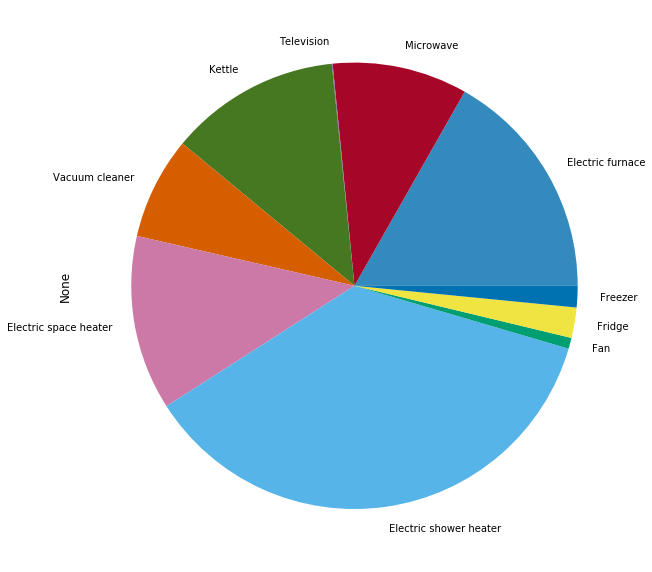

In [91]:
# Creacion de convenientes etiquetas
labels = elec.get_labels(fraction.index)
plt.figure(figsize=(10,30))
fraction.plot(kind='pie', labels=labels);

## Gráficos

### Vacuum Cleaner

Veamos ahora en forma de grafico las potencias activa y reactiva junto a la tension y la corriente para el medidor numero 6 (Vacuum Cleaner).Primero veamos el timeframe.

NameError: name 'df_ef' is not defined

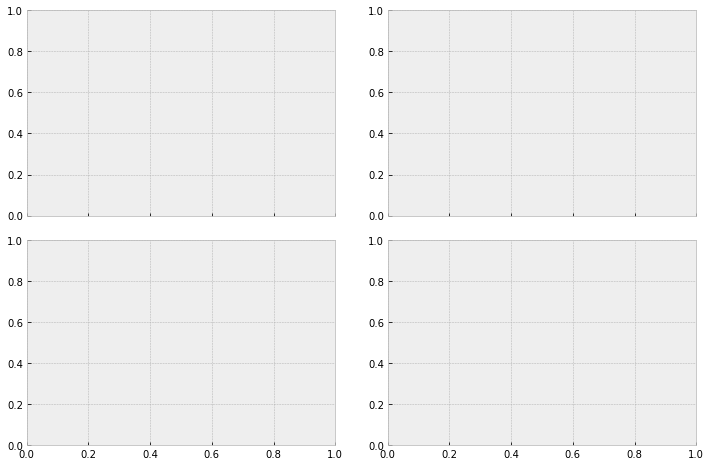

In [92]:
t0 = '2022-11-07 10:25:50+01:00' #tiempo inicial
t1 = '2022-11-07 12:37:15+01:00' #tiempo final


df_vac = next(elec[2].load())[t0:t1] #DataFrame medidor 

#graficos

rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_ef['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_vac Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,1450])

df_ef['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_vac Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,270])

df_ef['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_vac Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_ef['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_vac Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,7.5])


ax1.set(xlim=('2022-11-07 10:25:50+01:00','2022-11-07 12:37:15+01:00'))
ax1.minorticks_off()
ax1.set_xticklabels(['09:40','11:44'])
fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_ef.svg', bbox_inches='tight', transparent=True)
pass

In [ ]:
t0 = '2022-11-07 10:25:50+01:00' #tiempo inicial
t1 = '2022-11-07 12:37:15+01:00' #tiempo final


df_mi = next(elec[3].load())[t0:t1] #DataFrame medidor 


rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_mi['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_freezer Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,1450])

df_mi['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_freezer Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,270])

df_mi['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_freezer Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_mi['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_freezer Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,7.5])

ax1.set(xlim=('2022-11-07 10:25:50+01:00','2022-11-07 12:37:15+01:00'))
ax1.minorticks_off()
ax1.set_xticklabels(['09:40','11:45'])
fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_freezer.svg', bbox_inches='tight', transparent=True)
pass

In [ ]:
t0 = '2022-11-07 10:25:50+01:00' #tiempo inicial
t1 = '2022-11-07 12:37:15+01:00' #tiempo final


df_tv = next(elec[4].load())[t0:t1] #DataFrame medidor boiler
rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_tv['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_boiler Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,1450])

df_tv['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_boiler Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,270])

df_tv['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_boiler Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_tv['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_boiler Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,7.5])

ax1.set(xlim=('2022-11-07 10:25:50+01:00','2022-11-07 12:37:15+01:00'))

ax1.minorticks_off()
ax1.set_xticklabels(['09:40','11:45'])
fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_boiler.svg', bbox_inches='tight', transparent=True)
pass

In [ ]:
t0 = '2022-11-07 10:25:50+01:00' #tiempo inicial
t1 = '2022-11-07 12:37:15+01:00' #tiempo final

df_ke = next(elec[5].load())[t0:t1] #DataFrame medidor boiler
rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_ke['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_fan Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,1450])

df_ke['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_fan Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,270])

df_ke['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_fan Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_ke['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_fan Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,7.5])

ax1.set(xlim=('2022-11-07 10:25:50+01:00','2022-11-07 12:37:15+01:00'))
ax1.minorticks_off()
ax1.set_xticklabels(['09:40','11:45'])
fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_light.svg', bbox_inches='tight', transparent=True)
pass

In [ ]:
t0 = '2022-11-07 10:25:50+01:00' #tiempo inicial
t1 = '2022-11-07 12:37:15+01:00' #tiempo final



df_vc = next(elec[6].load())[t0:t1] #DataFrame medidor boiler

rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_vc ['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_tv  Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,1450])

df_vc ['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_tv Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,270])

df_vc ['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_tv  Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_vc ['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_tv  Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,7.5])


ax1.set(xlim=('2022-11-07 10:25:50+01:00','2022-11-07 12:37:15+01:00'))

ax1.minorticks_off()
ax1.set_xticklabels(['09:40','11:45'])
fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_fan.svg', bbox_inches='tight', transparent=True)
pass

In [ ]:
t0 = '2022-11-07 10:25:50+01:00' #tiempo inicial
t1 = '2022-11-07 12:37:15+01:00' #tiempo final



df_sh = next(elec[7].load())[t0:t1] #DataFrame medidor boiler

rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_sh ['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_tv  Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,1450])

df_sh ['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_tv Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,270])

df_sh ['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_tv  Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_sh ['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_tv  Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,7.5])


ax1.set(xlim=('2022-11-07 10:25:50+01:00','2022-11-07 12:37:15+01:00'))

ax1.minorticks_off()
ax1.set_xticklabels(['09:40','11:45'])
fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_fan.svg', bbox_inches='tight', transparent=True)
pass

In [ ]:
t0 = '2022-11-07 10:25:50+01:00' #tiempo inicial
t1 = '2022-11-07 12:37:15+01:00' #tiempo final



df_sho = next(elec[8].load())[t0:t1] #DataFrame medidor boiler

rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_sho ['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_tv  Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,1450])

df_sho ['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_tv Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,270])

df_sho ['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_tv  Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_sho ['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_tv  Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,7.5])

ax1.set(xlim=('2022-11-07 10:25:50+01:00','2022-11-07 12:37:15+01:00'))

ax1.minorticks_off()
ax1.set_xticklabels(['09:40','11:45'])
fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_fan.svg', bbox_inches='tight', transparent=True)
pass

In [ ]:
t0 = '2022-11-07 10:25:50+01:00' #tiempo inicial
t1 = '2022-11-07 12:37:15+01:00' #tiempo final



df_fan = next(elec[9].load())[t0:t1] #DataFrame medidor boiler

rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_fan ['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_tv  Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,1450])

df_fan ['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_tv Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,270])

df_fan ['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_tv  Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_fan ['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_tv  Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,7.5])

ax1.set(xlim=('2022-11-07 10:25:50+01:00','2022-11-07 12:37:15+01:00'))

ax1.minorticks_off()
ax1.set_xticklabels(['09:40','11:45'])
fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_fan.svg', bbox_inches='tight', transparent=True)
pass

In [ ]:
t0 = '2022-11-07 10:25:50+01:00' #tiempo inicial
t1 = '2022-11-07 12:37:15+01:00' #tiempo final



df_fri = next(elec[10].load())[t0:t1] #DataFrame medidor boiler

rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_fri ['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_tv  Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,1450])

df_fri ['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_tv Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,270])

df_fri ['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_fridge  Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_fri ['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_fridge  Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,7.5])


ax1.set(xlim=('2022-11-07 10:25:50+01:00','2022-11-07 12:37:15+01:00'))

ax1.minorticks_off()
ax1.set_xticklabels(['09:40','11:45'])
fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_fridge.svg', bbox_inches='tight', transparent=True)
pass

In [ ]:
t0 = '2022-11-07 10:25:50+01:00' #tiempo inicial
t1 = '2022-11-07 12:37:15+01:00' #tiempo final



df_fre = next(elec[11].load())[t0:t1] #DataFrame medidor boiler

rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_fre ['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_freezer  Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,1450])

df_fre ['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_freezer Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,270])

df_fre ['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_freezer  Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_fre ['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_freezer Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,7.5])

ax1.set(xlim=('2022-11-07 10:25:50+01:00','2022-11-07 12:37:15+01:00'))

ax1.minorticks_off()
ax1.set_xticklabels(['09:40','11:45'])
fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_freezer.svg', bbox_inches='tight', transparent=True)
pass

In [ ]:
t0 = '2022-11-07 10:25:50+01:00' #tiempo inicial
t1 = '2022-11-07 12:37:15+01:00' #tiempo final



df_main = next(elec[1].load())[t0:t1] #DataFrame medidor boiler
rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_main['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_main Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,1450])

df_main['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_main Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,270])

df_main['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_main Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_main['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_main Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,7.5])

ax1.set(xlim=('2022-11-07 10:25:50+01:00','2022-11-07 12:37:15+01:00'))

ax1.minorticks_off()
ax1.set_xticklabels(['9:40','11:45'])
fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_tv.svg', bbox_inches='tight', transparent=True)
pass

### Trazar los electrodomésticos cuando estén en uso

In [ ]:
#sns.set_palette("Set3", n_colors=12)
# Set a threshold to remove residual power noise when devices are off
elec.plot_when_on(on_power_threshold = 40)

## Trazar datos submedidos para un solo día

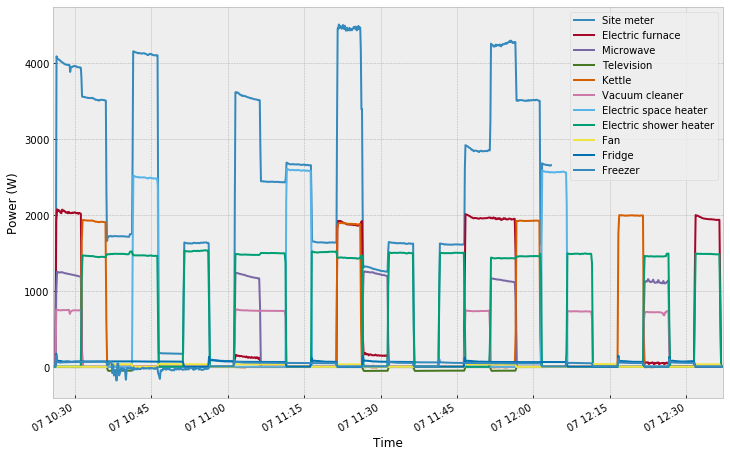

In [166]:
dsualmh.set_window(start='2022-11', end='2022-12')
elec.plot();
plt.xlabel("Time");

## Gráfico de autocorrelación

In [167]:
from pandas.plotting import autocorrelation_plot

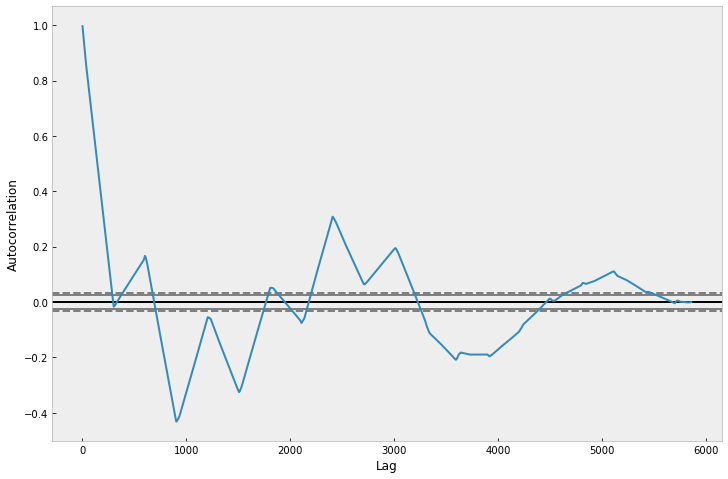

In [168]:
elec.mains().plot_autocorrelation();

## Cambio en el muestreo de datos

Al cambiar el muestro de datos, NILMTK utiliza por defecto el método mean o media aritmética el cual calculará un promedio de los valores que se encuentren de la serie de tiempo, divididos en grupos correspondientes al nuevo periodo de muestreo. Además de este método se pueden especificar otros tales como el primer dato válido (first), la mediana (median), el valor más cercano (nearest), o utilizar el valor inmediatamente posterior (ffill o pad), entre otros.

### Energia activa

Vamos ahora analizar la potencia  activa correspondiente el contador global  usando diferentes periodos de muestreo

In [169]:
m = 1 #meter
method1 = {'how': 'mean'}
method2 = {'how': 'median'}
method3 = {'how': 'first'}

#medición original, cada 1 segundo
df_1s   = next(elec[m].load(ac_type='active',sample_period=1,       resample_kwargs=method1))
#resamples
df1_10s  = next(elec[m].load(ac_type='active', sample_period=10,     resample_kwargs=method1))
df1_30s  = next(elec[m].load(ac_type='active', sample_period=30,     resample_kwargs=method1))
df1_60s  = next(elec[m].load(ac_type='active', sample_period=60*1,   resample_kwargs=method1))
df1_5m   = next(elec[m].load(ac_type='active', sample_period=60*5,   resample_kwargs=method1))
df1_10m  = next(elec[m].load(ac_type='active', sample_period=60*10,  resample_kwargs=method1))
df1_15m  = next(elec[m].load(ac_type='active', sample_period=60*15,  resample_kwargs=method1))
df1_30m  = next(elec[m].load(ac_type='active', sample_period=60*30,  resample_kwargs=method1))

df2_10s  = next(elec[m].load(ac_type='active', sample_period=10,    resample_kwargs=method2))
df2_30s  = next(elec[m].load(ac_type='active', sample_period=30,    resample_kwargs=method2))
df2_60s  = next(elec[m].load(ac_type='active', sample_period=60*1,  resample_kwargs=method2))
df2_5m   = next(elec[m].load(ac_type='active', sample_period=60*5,  resample_kwargs=method2))
df2_10m  = next(elec[m].load(ac_type='active', sample_period=60*10,  resample_kwargs=method2))
df2_15m  = next(elec[m].load(ac_type='active', sample_period=60*15,  resample_kwargs=method2))
df2_30m  = next(elec[m].load(ac_type='active', sample_period=60*30,  resample_kwargs=method2))

df3_10s  = next(elec[m].load(ac_type='active', sample_period=10,    resample_kwargs=method3))
df3_30s  = next(elec[m].load(ac_type='active', sample_period=30,    resample_kwargs=method3))
df3_60s  = next(elec[m].load(ac_type='active', sample_period=60*1,  resample_kwargs=method3))
df3_5m   = next(elec[m].load(ac_type='active', sample_period=60*5,  resample_kwargs=method3))
df3_10m  = next(elec[m].load(ac_type='active', sample_period=60*10,  resample_kwargs=method3))
df3_15m  = next(elec[m].load(ac_type='active', sample_period=60*15,  resample_kwargs=method3))
df3_30m  = next(elec[m].load(ac_type='active', sample_period=60*30,  resample_kwargs=method3))

#dataframe completo
dfs1=[df_1s,df1_10s,df1_30s,df1_60s,df1_5m,df1_10m,df1_15m,df1_30m]
#dataframe completo
dfs2=[df_1s,df2_10s,df2_30s,df2_60s,df2_5m,df2_10m,df2_15m,df2_30m]
#dataframe completo
dfs3=[df_1s,df3_10s,df3_30s,df3_60s,df3_5m,df3_10m,df3_15m,df3_30m]

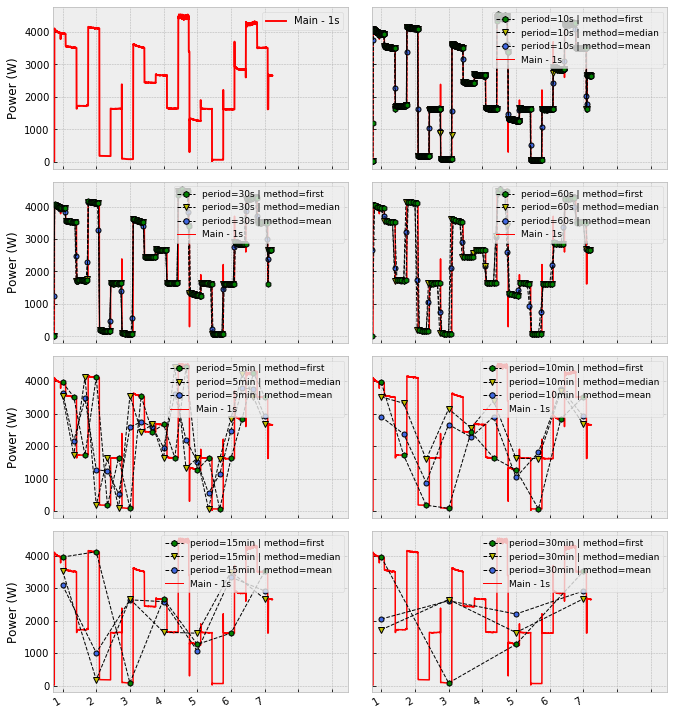

In [170]:
rcParams['figure.figsize'] = (11, 14)

t0 = '2022-11-07 10:25:50+01:00' #tiempo inicial
t1 = '2022-11-07 12:37:15+01:00' #tiempo final

labels_ = ['Main - 1s','10s','30s','60s','5min','10min','15min','30min']
fig, ((ax1, ax2), (ax3, ax4),(ax5, ax6),(ax7, ax8)) = plt.subplots(4, 2, sharex=True, sharey=True,
                                                                   gridspec_kw={'hspace': 0.08, 'wspace': 0.08})
i = 1
for ax in fig.get_axes():   
    if ax == ax1:
        df_1s[t0:t1].plot(ax=ax,linewidth=1.9,color='r')
        ax.legend([labels_[0]])               
    else:
        import matplotlib.lines as mlines
        df_1s[t0:t1].plot(ax=ax,linewidth=1.5,color='r') 
        dfs1[i][t0:t1].plot(ax=ax,lw=1, c='k', ls='--', marker="o", markersize=5, markerfacecolor='royalblue')    
        dfs2[i][t0:t1].plot(ax=ax,lw=1, c='k', ls='--', marker="v", markersize=5.5, markerfacecolor='y')
        dfs3[i][t0:t1].plot(ax=ax,lw=1, c='k', ls='--', marker="h", markersize=5.5, markerfacecolor='g')
        #etiquetas
        line0 = mlines.Line2D([], [], lw=1, c='red', label= labels_[0])
        line1 = mlines.Line2D([], [], lw=1, c='k', ls='--', marker="o", markersize=5.5,
                              markerfacecolor='royalblue', label='period='+labels_[i]+' | method=mean')
        line2 = mlines.Line2D([], [], lw=1, c='k', ls='--', marker="v", markersize=6,
                              markerfacecolor='y', label='period='+labels_[i] + ' | method=median')
        ax.legend(handles=[line2, line1, line0], fontsize=9)
        line3 = mlines.Line2D([], [], lw=1, c='k', ls='--', marker="h", markersize=6,
                              markerfacecolor='g', label='period='+labels_[i] + ' | method=first')
        ax.legend(handles=[line3, line2, line1, line0], fontsize=9)
        plt.setp(ax.xaxis.get_majorticklabels(), ha='right')
        i = i+1
    ax.set(ylabel='Power (W)')

ax1.set(xlim=('2022-11-07 10:25:50+01:00','2022-11-07 12:37:15+01:00'))
ax1.minorticks_off()
ax1.set_xticklabels(['1','2','3','4','5','6','7'])

#guarda gráfico
plt.savefig('./data/images/2.3_Resample.svg', bbox_inches='tight', transparent=True)
pass

### Energia reactiva

Vamos ahora analizar la potencia  reactiva correspondiente el contador global  usando diferentes periodos de muestreo

In [171]:
m = 1 #meter
method1 = {'how': 'mean'}
method2 = {'how': 'median'}
method3 = {'how': 'first'}

#medición original, cada 1 segundo
df_1s   = next(elec[m].load(ac_type='reactive',sample_period=1,       resample_kwargs=method1))
#resamples
df1_10s  = next(elec[m].load(ac_type='reactive', sample_period=10,     resample_kwargs=method1))
df1_30s  = next(elec[m].load(ac_type='reactive', sample_period=30,     resample_kwargs=method1))
df1_60s  = next(elec[m].load(ac_type='reactive', sample_period=60*1,   resample_kwargs=method1))
df1_5m   = next(elec[m].load(ac_type='reactive', sample_period=60*5,   resample_kwargs=method1))
df1_10m  = next(elec[m].load(ac_type='reactive', sample_period=60*10,  resample_kwargs=method1))
df1_15m  = next(elec[m].load(ac_type='reactive', sample_period=60*15,  resample_kwargs=method1))
df1_30m  = next(elec[m].load(ac_type='reactive', sample_period=60*30,  resample_kwargs=method1))

df2_10s  = next(elec[m].load(ac_type='reactive', sample_period=10,    resample_kwargs=method2))
df2_30s  = next(elec[m].load(ac_type='reactive', sample_period=30,    resample_kwargs=method2))
df2_60s  = next(elec[m].load(ac_type='reactive', sample_period=60*1,  resample_kwargs=method2))
df2_5m   = next(elec[m].load(ac_type='reactive', sample_period=60*5,  resample_kwargs=method2))
df2_10m  = next(elec[m].load(ac_type='reactive', sample_period=60*10,  resample_kwargs=method2))
df2_15m  = next(elec[m].load(ac_type='reactive', sample_period=60*15,  resample_kwargs=method2))
df2_30m  = next(elec[m].load(ac_type='reactive', sample_period=60*30,  resample_kwargs=method2))

df3_10s  = next(elec[m].load(ac_type='reactive', sample_period=10,    resample_kwargs=method3))
df3_30s  = next(elec[m].load(ac_type='reactive', sample_period=30,    resample_kwargs=method3))
df3_60s  = next(elec[m].load(ac_type='reactive', sample_period=60*1,  resample_kwargs=method3))
df3_5m   = next(elec[m].load(ac_type='reactive', sample_period=60*5,  resample_kwargs=method3))
df3_10m  = next(elec[m].load(ac_type='reactive', sample_period=60*10,  resample_kwargs=method3))
df3_15m  = next(elec[m].load(ac_type='reactive', sample_period=60*15,  resample_kwargs=method3))
df3_30m  = next(elec[m].load(ac_type='reactive', sample_period=60*30,  resample_kwargs=method3))

#dataframe completo
dfs1=[df_1s,df1_10s,df1_30s,df1_60s,df1_5m,df1_10m,df1_15m,df1_30m]
#dataframe completo
dfs2=[df_1s,df2_10s,df2_30s,df2_60s,df2_5m,df2_10m,df2_15m,df2_30m]
#dataframe completo
dfs3=[df_1s,df3_10s,df3_30s,df3_60s,df3_5m,df3_10m,df3_15m,df3_30m]

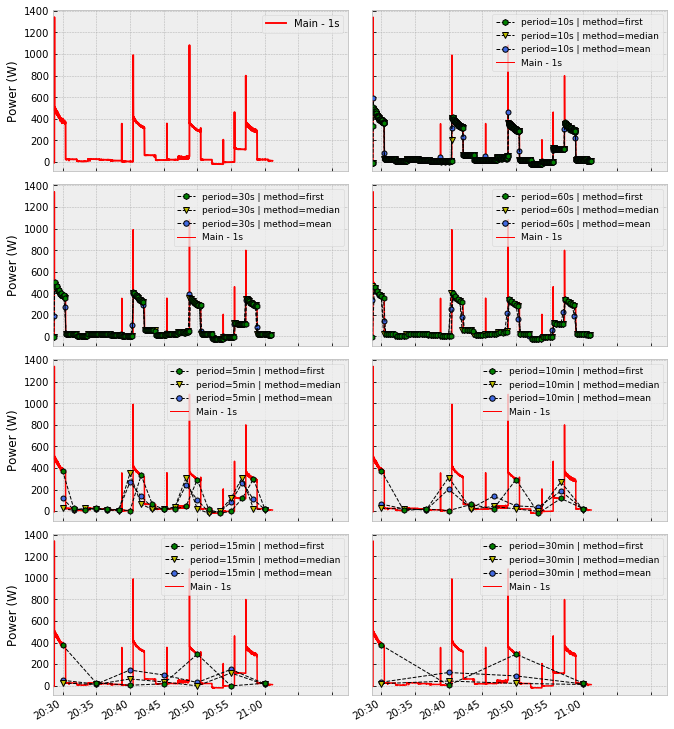

In [172]:
rcParams['figure.figsize'] = (11, 14)

t0 = '2022-11-07 10:25:50+01:00' #tiempo inicial
t1 = '2022-11-07 12:37:15+01:00' #tiempo final


labels_ = ['Main - 1s','10s','30s','60s','5min','10min','15min','30min']
fig, ((ax1, ax2), (ax3, ax4),(ax5, ax6),(ax7, ax8)) = plt.subplots(4, 2, sharex=True, sharey=True,
                                                                   gridspec_kw={'hspace': 0.08, 'wspace': 0.08})
i = 1
for ax in fig.get_axes():   
    if ax == ax1:
        df_1s[t0:t1].plot(ax=ax,linewidth=1.9,color='r')
        ax.legend([labels_[0]])               
    else:
        import matplotlib.lines as mlines
        df_1s[t0:t1].plot(ax=ax,linewidth=1.5,color='r') 
        dfs1[i][t0:t1].plot(ax=ax,lw=1, c='k', ls='--', marker="o", markersize=5, markerfacecolor='royalblue')    
        dfs2[i][t0:t1].plot(ax=ax,lw=1, c='k', ls='--', marker="v", markersize=5.5, markerfacecolor='y')
        dfs3[i][t0:t1].plot(ax=ax,lw=1, c='k', ls='--', marker="h", markersize=5.5, markerfacecolor='g')
        #etiquetas
        line0 = mlines.Line2D([], [], lw=1, c='red', label= labels_[0])
        line1 = mlines.Line2D([], [], lw=1, c='k', ls='--', marker="o", markersize=5.5,
                              markerfacecolor='royalblue', label='period='+labels_[i]+' | method=mean')
        line2 = mlines.Line2D([], [], lw=1, c='k', ls='--', marker="v", markersize=6,
                              markerfacecolor='y', label='period='+labels_[i] + ' | method=median')
        ax.legend(handles=[line2, line1, line0], fontsize=9)
        line3 = mlines.Line2D([], [], lw=1, c='k', ls='--', marker="h", markersize=6,
                              markerfacecolor='g', label='period='+labels_[i] + ' | method=first')
        ax.legend(handles=[line3, line2, line1, line0], fontsize=9)
        plt.setp(ax.xaxis.get_majorticklabels(), ha='right')
        i = i+1
    ax.set(ylabel='Power (W)')

    
ax1.set(xlim=('2022-11-07 10:25:50+01:00','2022-11-07 12:37:15+01:00'))

ax1.minorticks_off()
ax1.set_xticklabels(['20:30','20:35','20:40','20:45','20:50','20:55','21:00'])

#guarda gráfico
plt.savefig('./data/images/2.4_Resample.svg', bbox_inches='tight', transparent=True)
pass